In [1]:
import h5py
import sys
sys.path.append('..')
from modules.configfile import config

In [2]:
hdf5_file = h5py.File(config['hdf5_filepath_prefix'], mode='r')

In [4]:
hdf5_file = hdf5_file['original_data']

In [5]:
import matplotlib.pyplot as plt
for i in range(0, 310, 10):
    plt.imshow(hdf5_file['training_hgg_patients_all_slices'][i, 2, :, :], cmap='gray')
    print(hdf5_file['pat_names_hgg_all_slices'][i])
    plt.show()

KeyError: "Unable to open object (object 'training_hgg_patients_all_slices' doesn't exist)"

In [11]:
from modules.mischelpers import Rect3D

plotting along axis 0


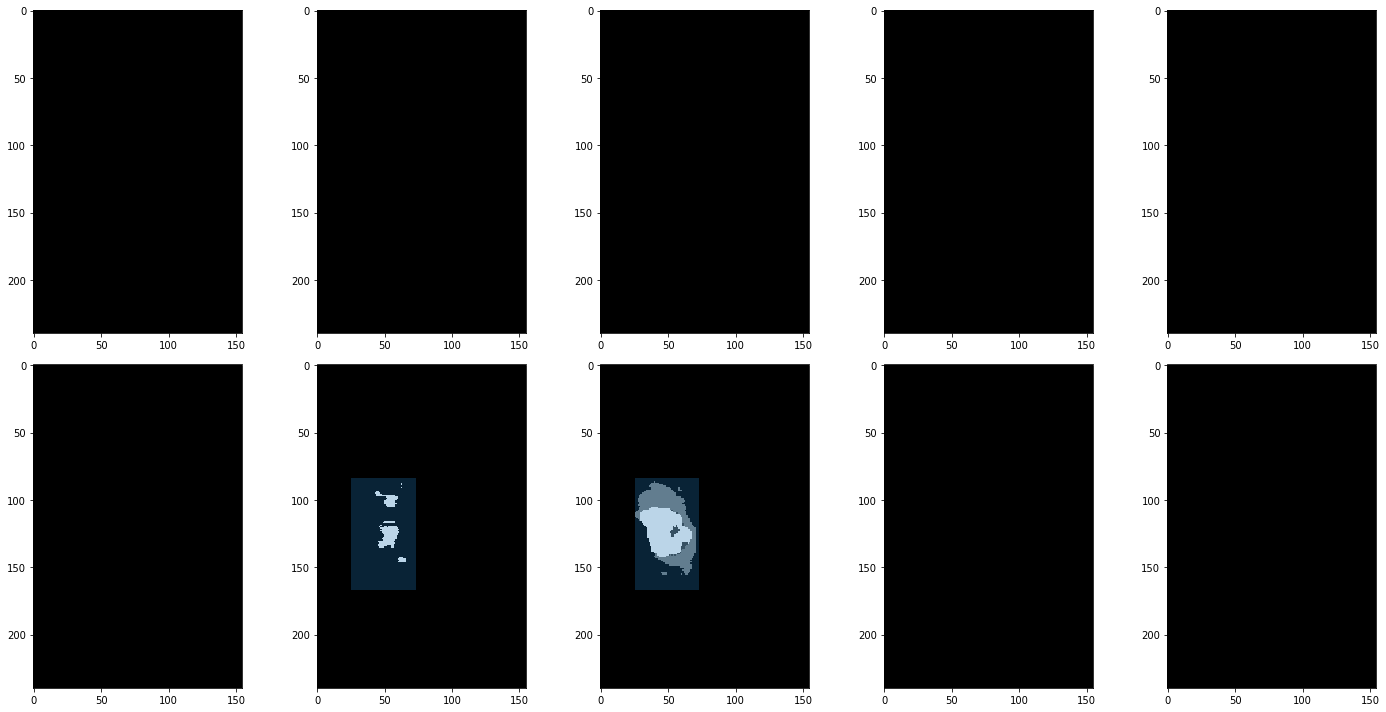

plotting along axis 1


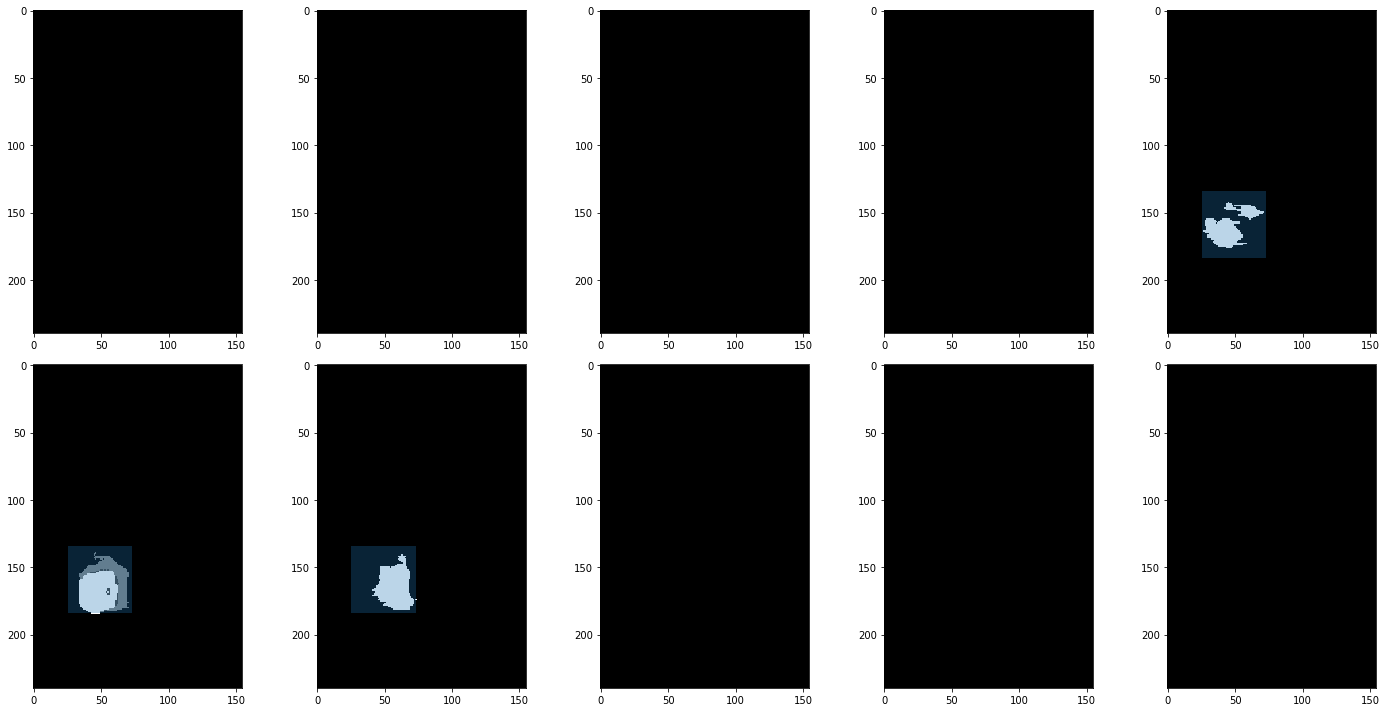

plotting along axis 2


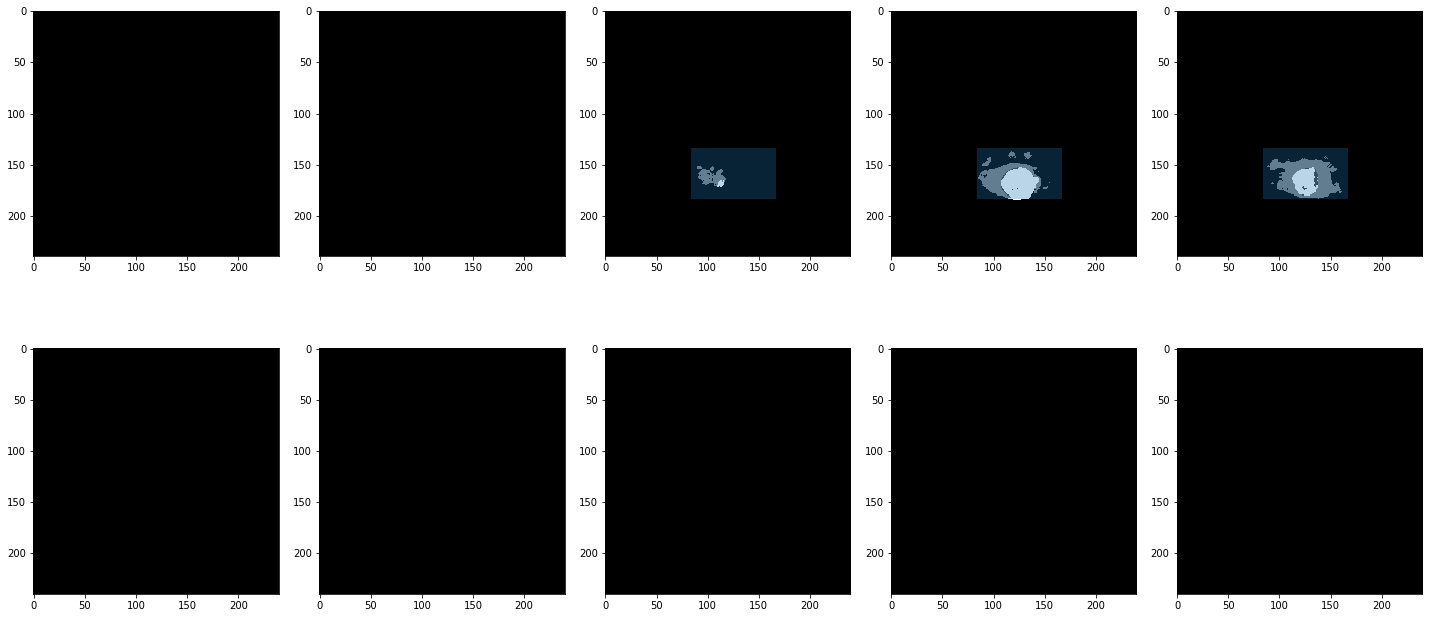

plotting along axis 0


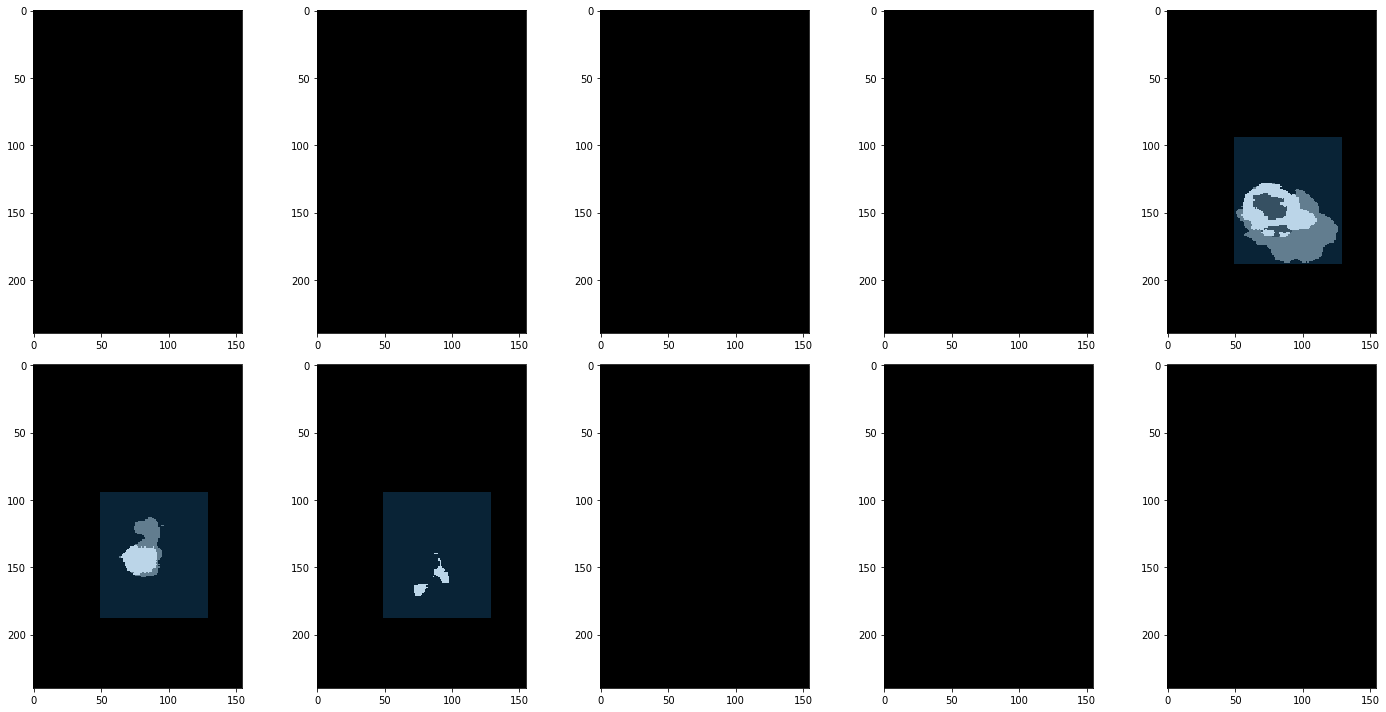

plotting along axis 1


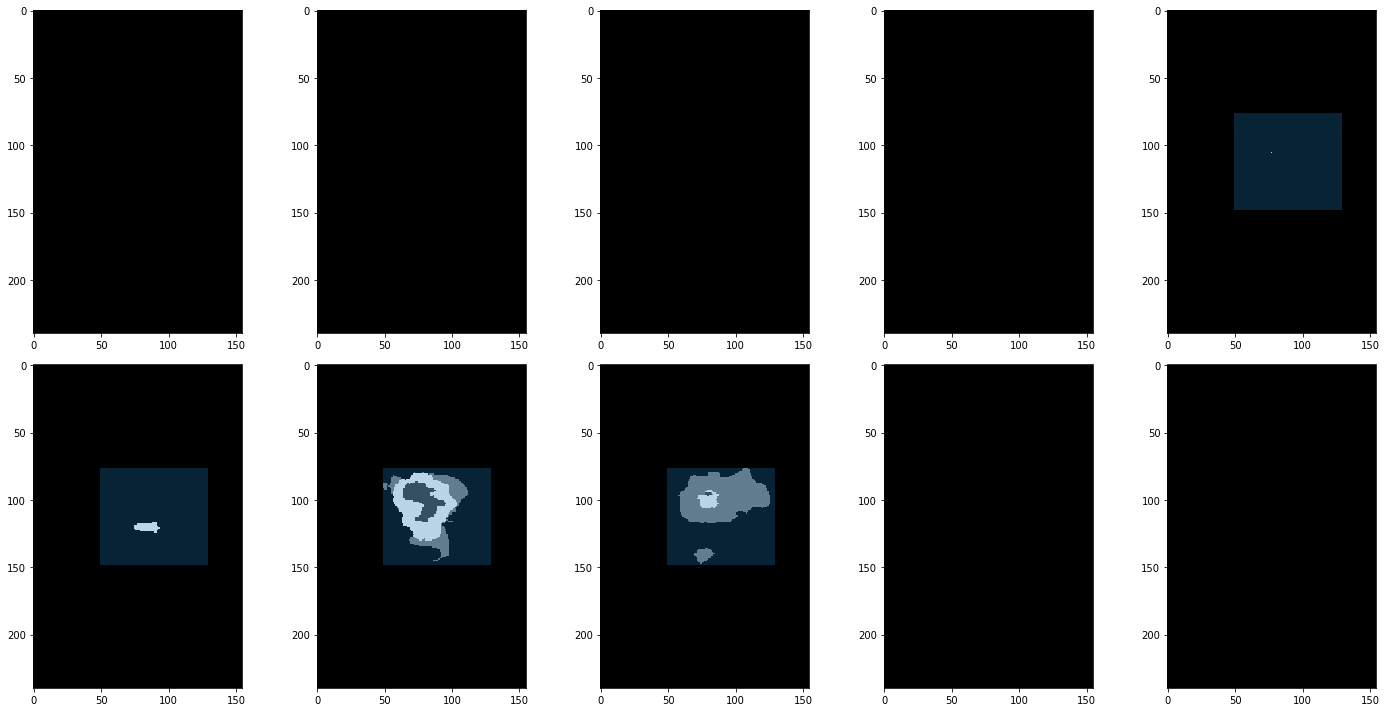

plotting along axis 2


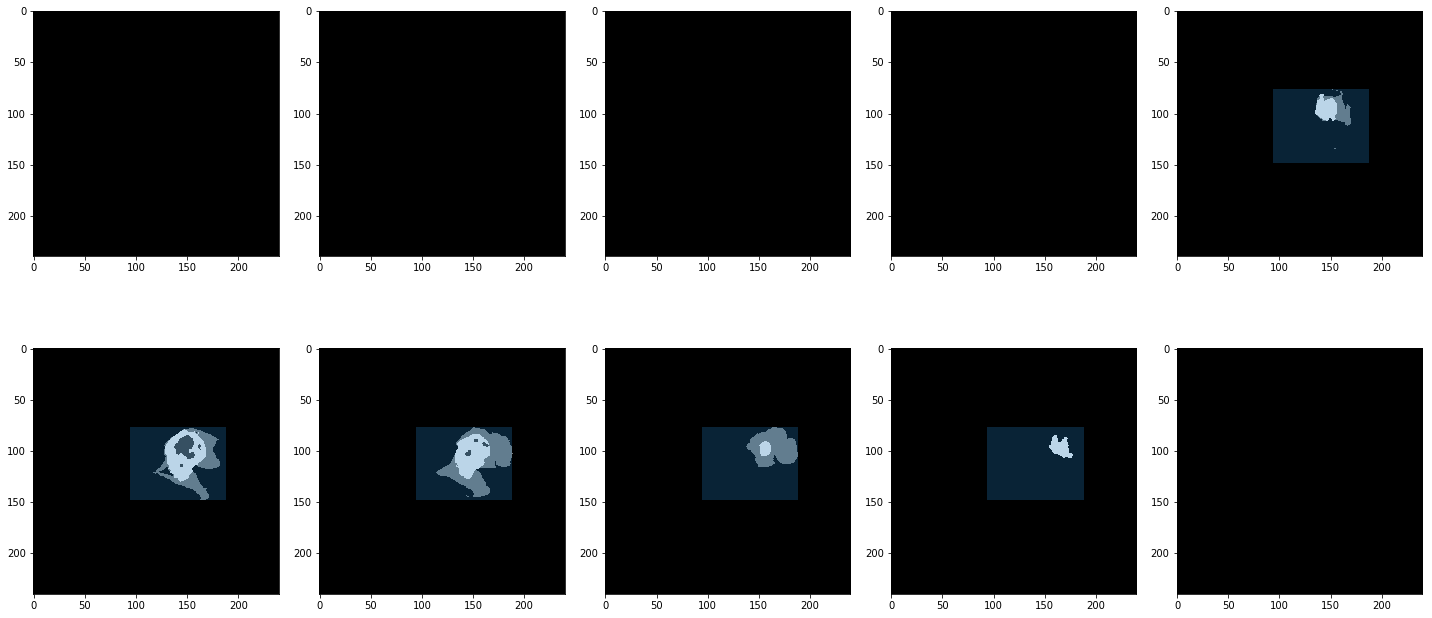

plotting along axis 0


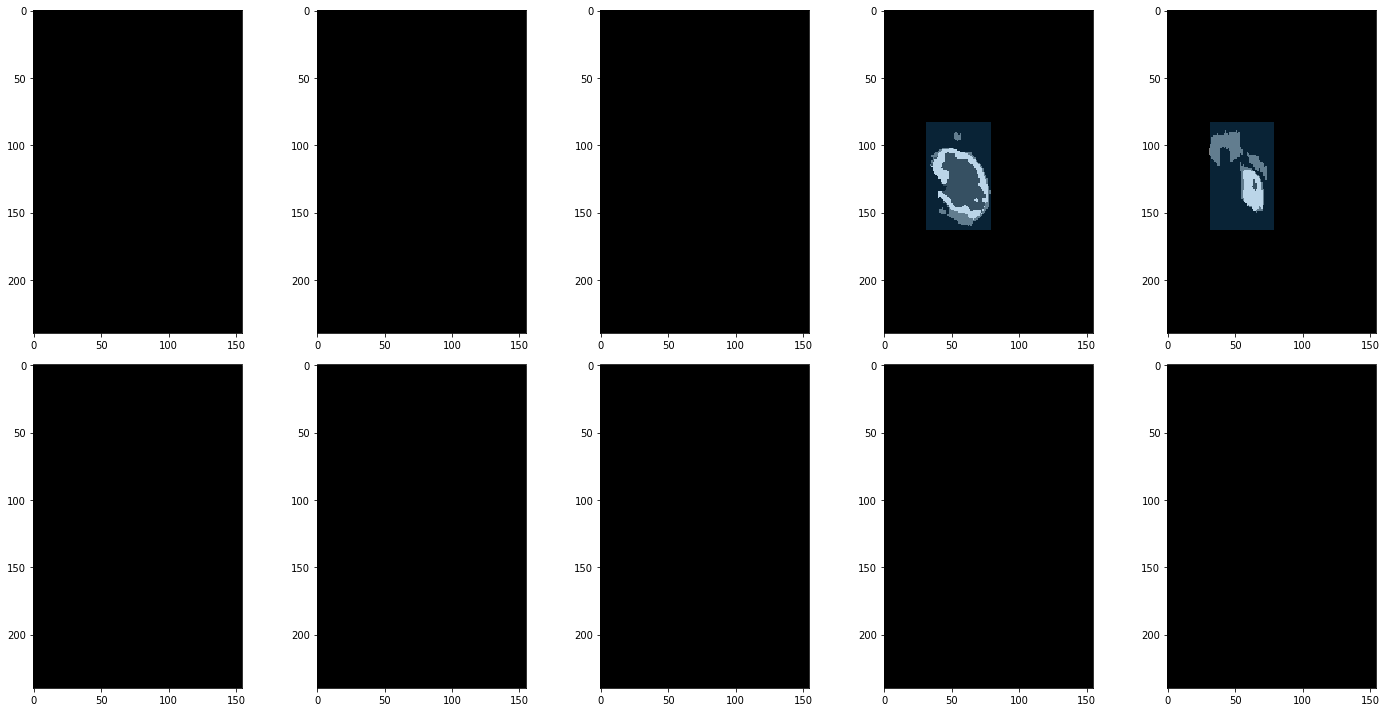

plotting along axis 1


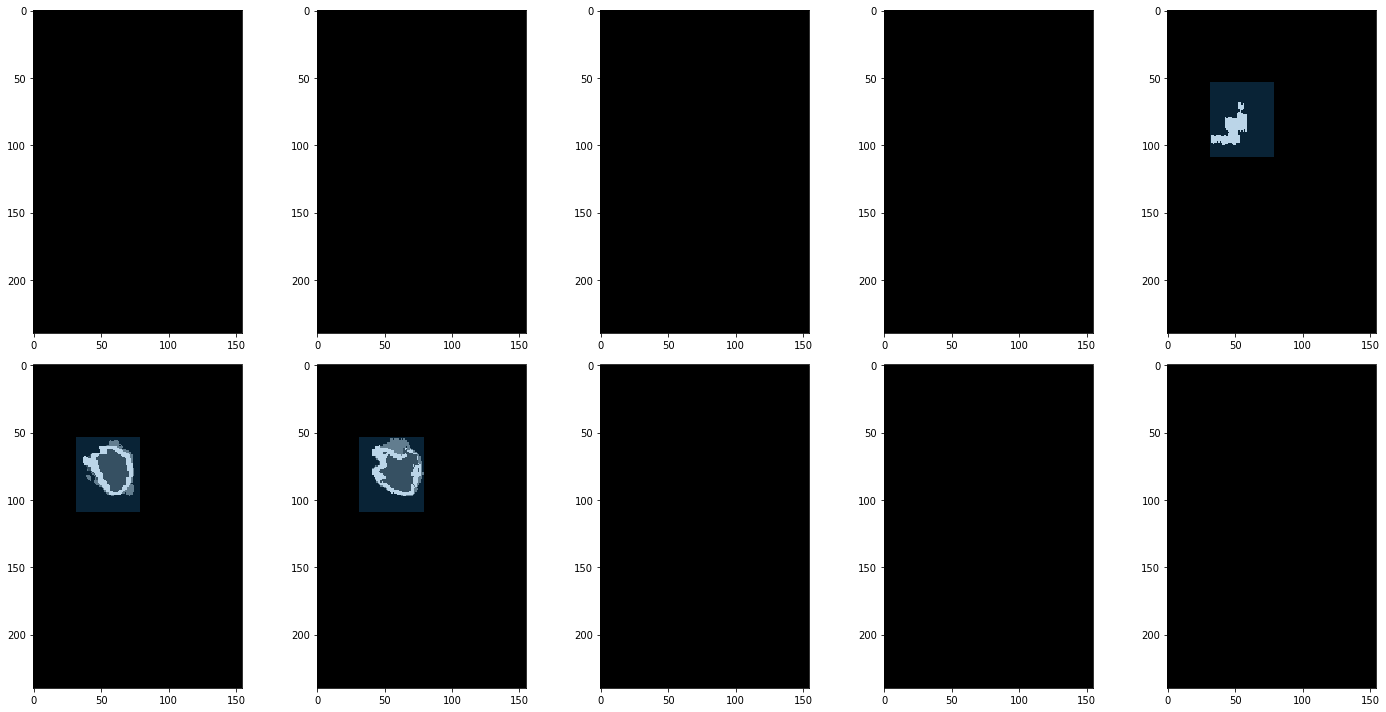

plotting along axis 2


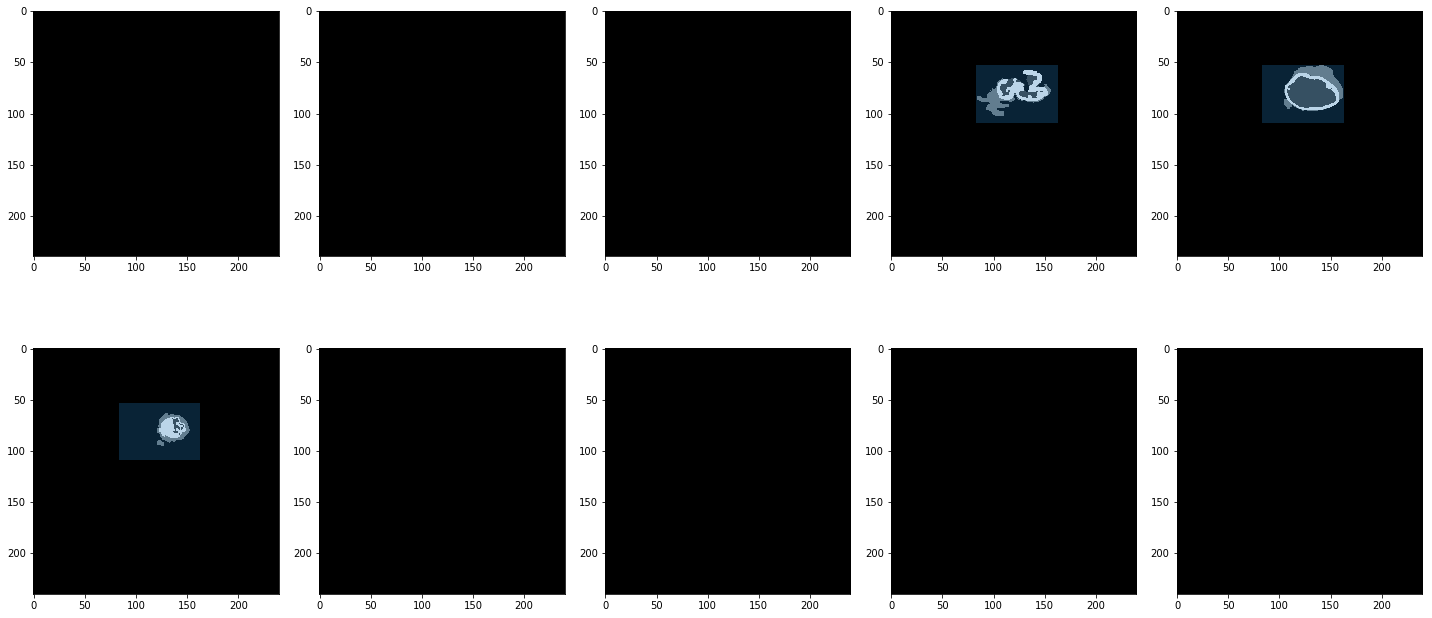

plotting along axis 0


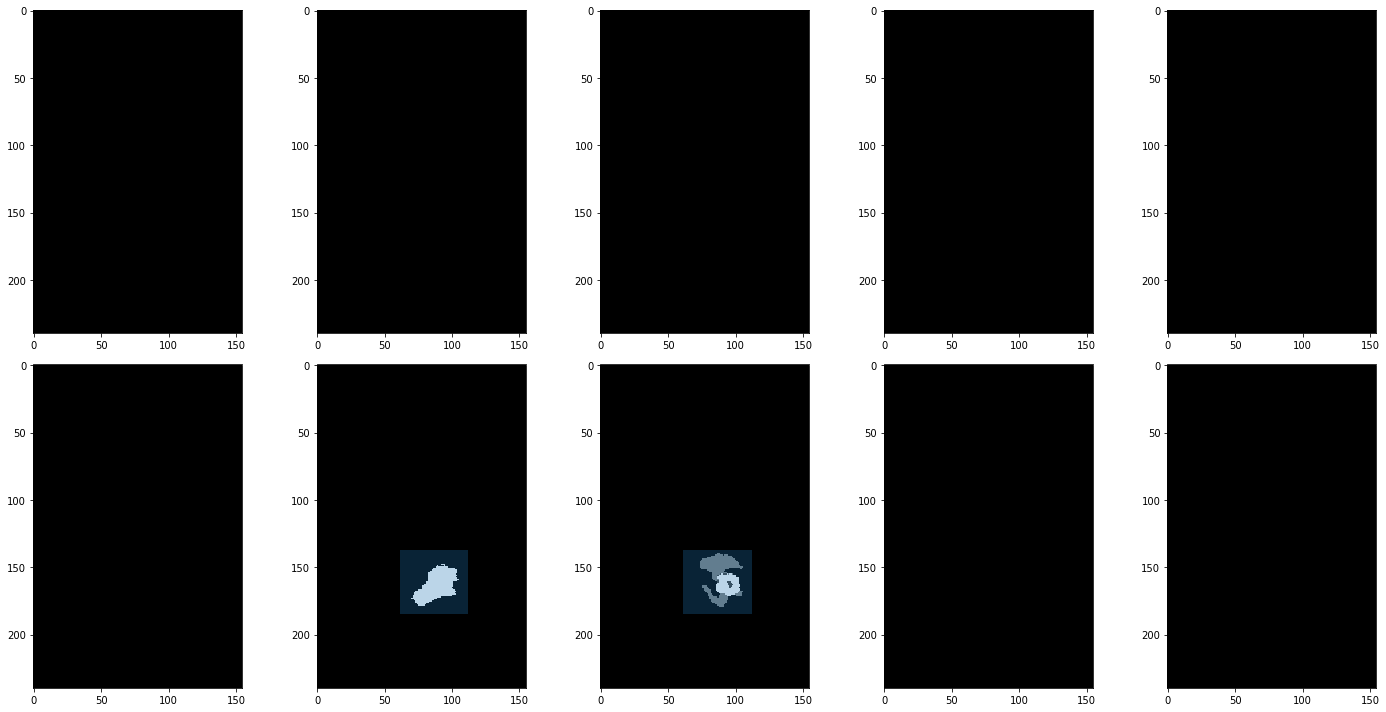

plotting along axis 1


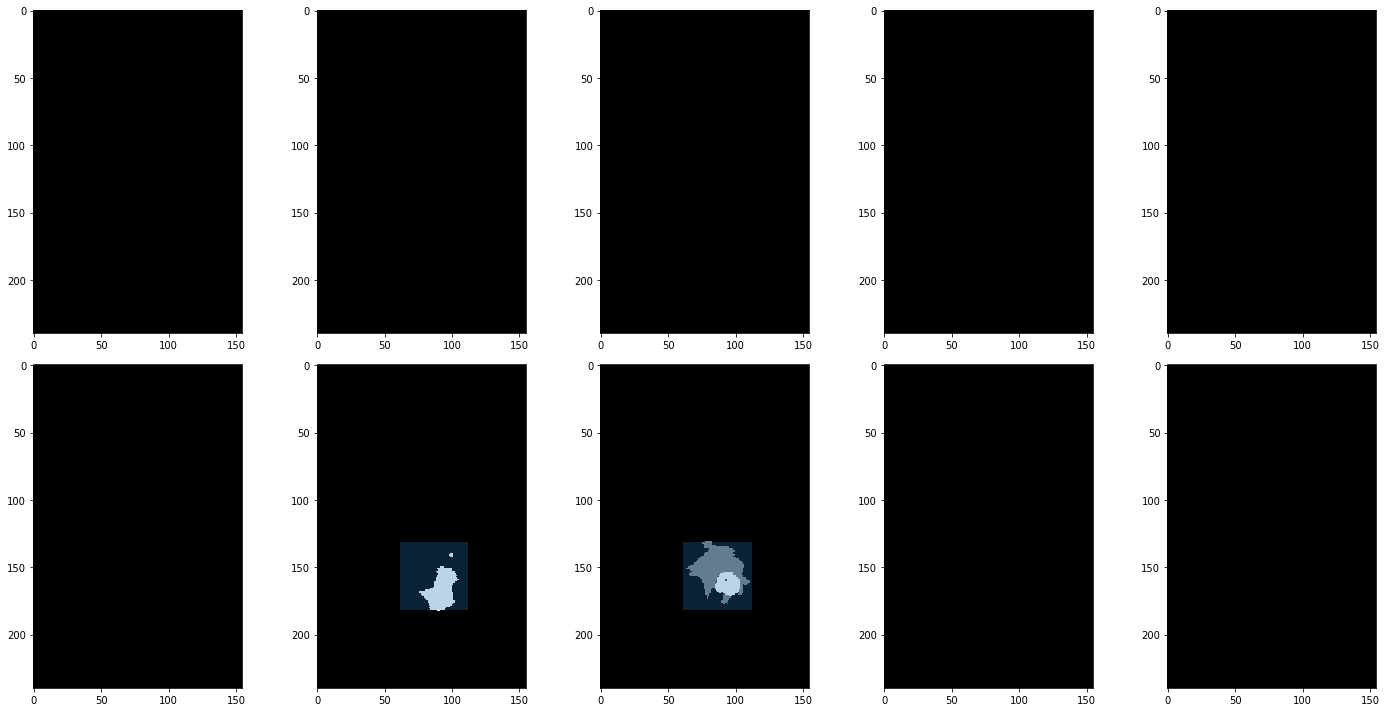

plotting along axis 2


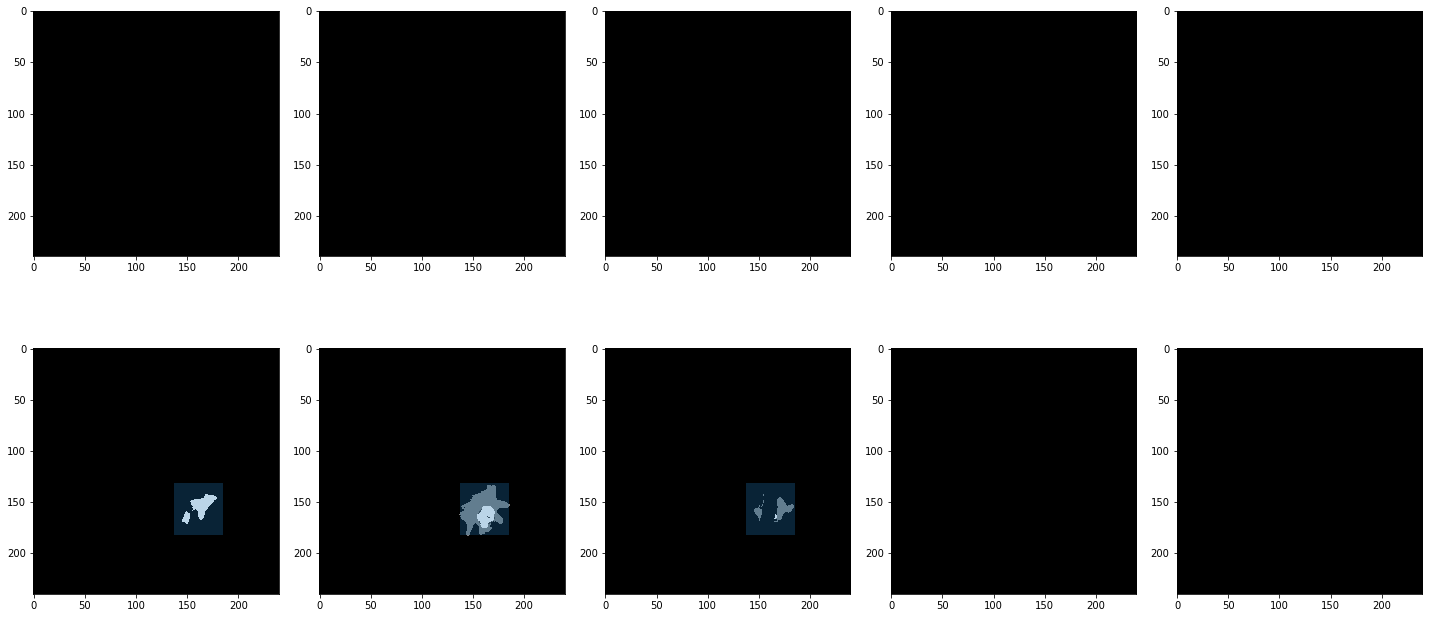

plotting along axis 0


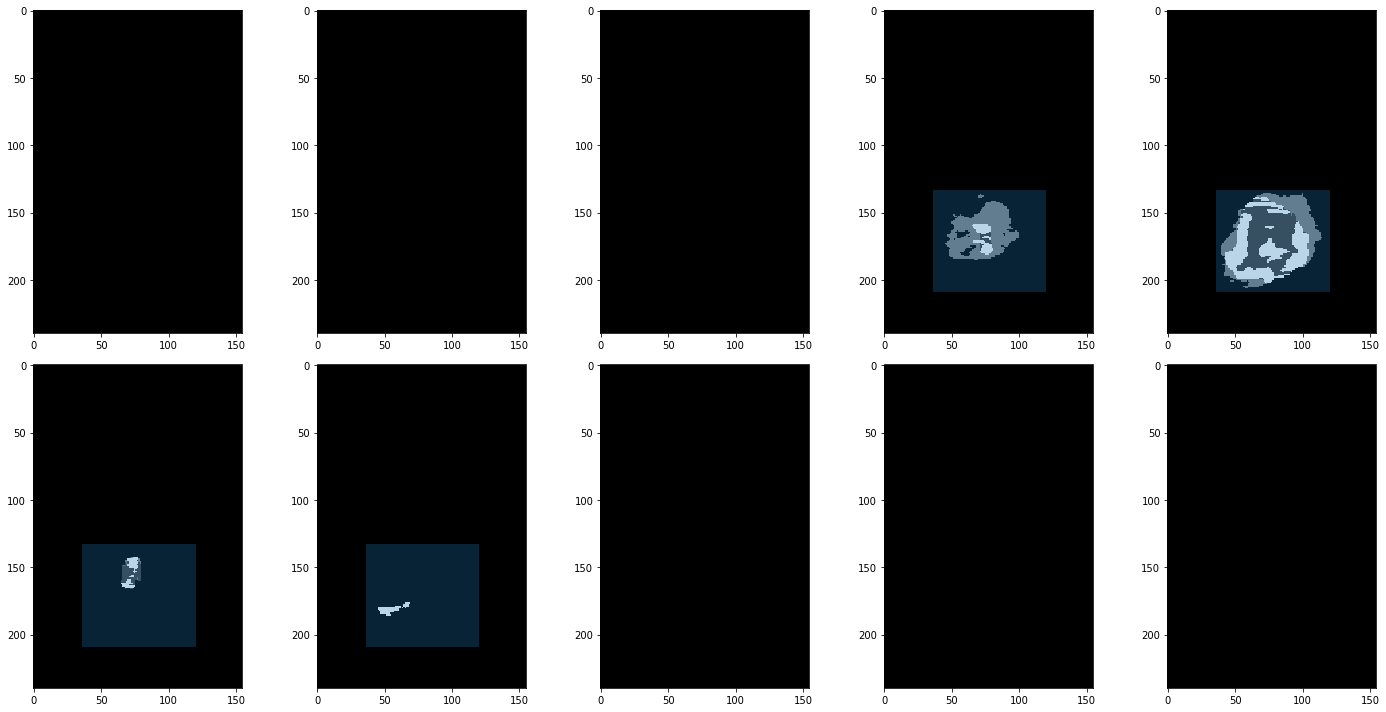

plotting along axis 1


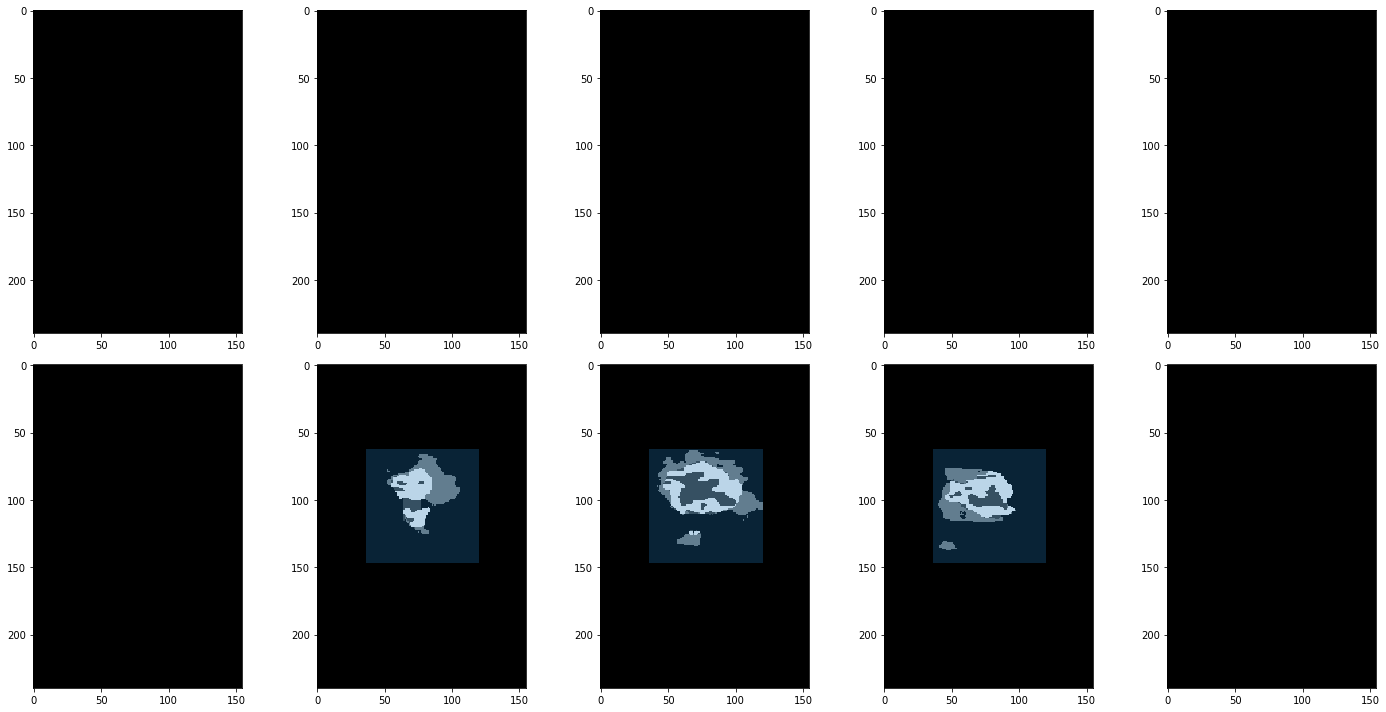

plotting along axis 2


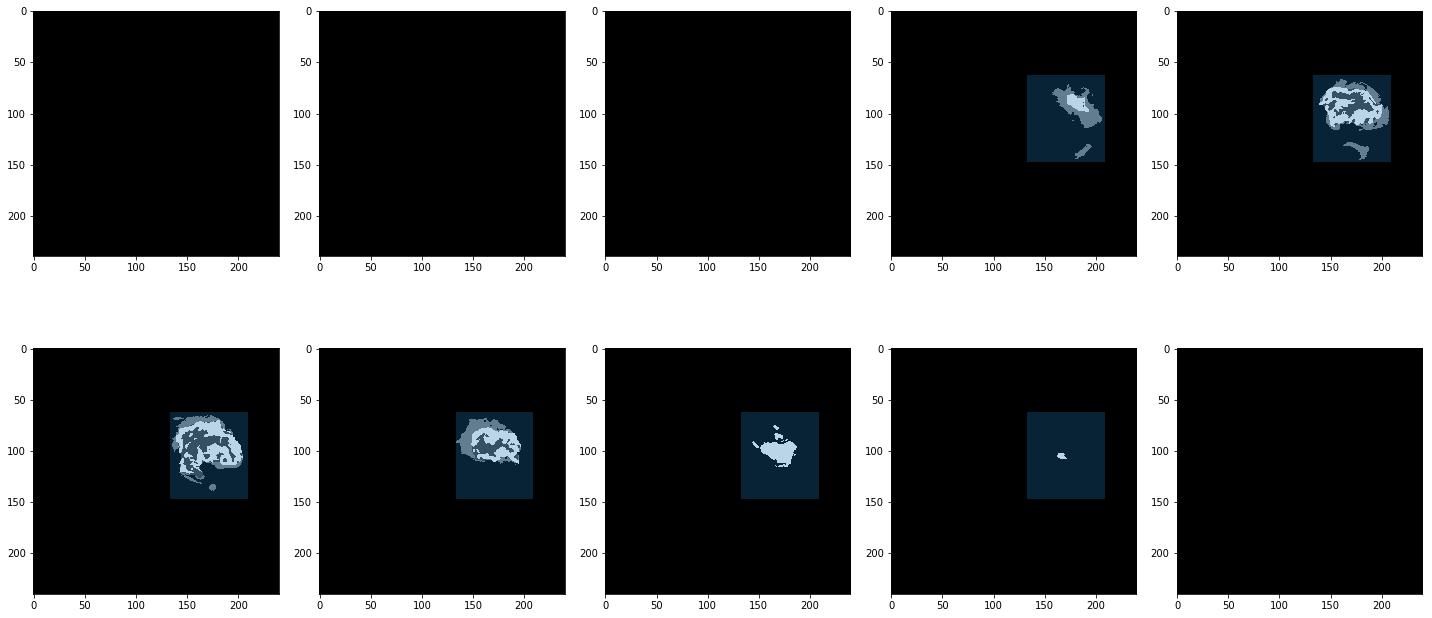

plotting along axis 0


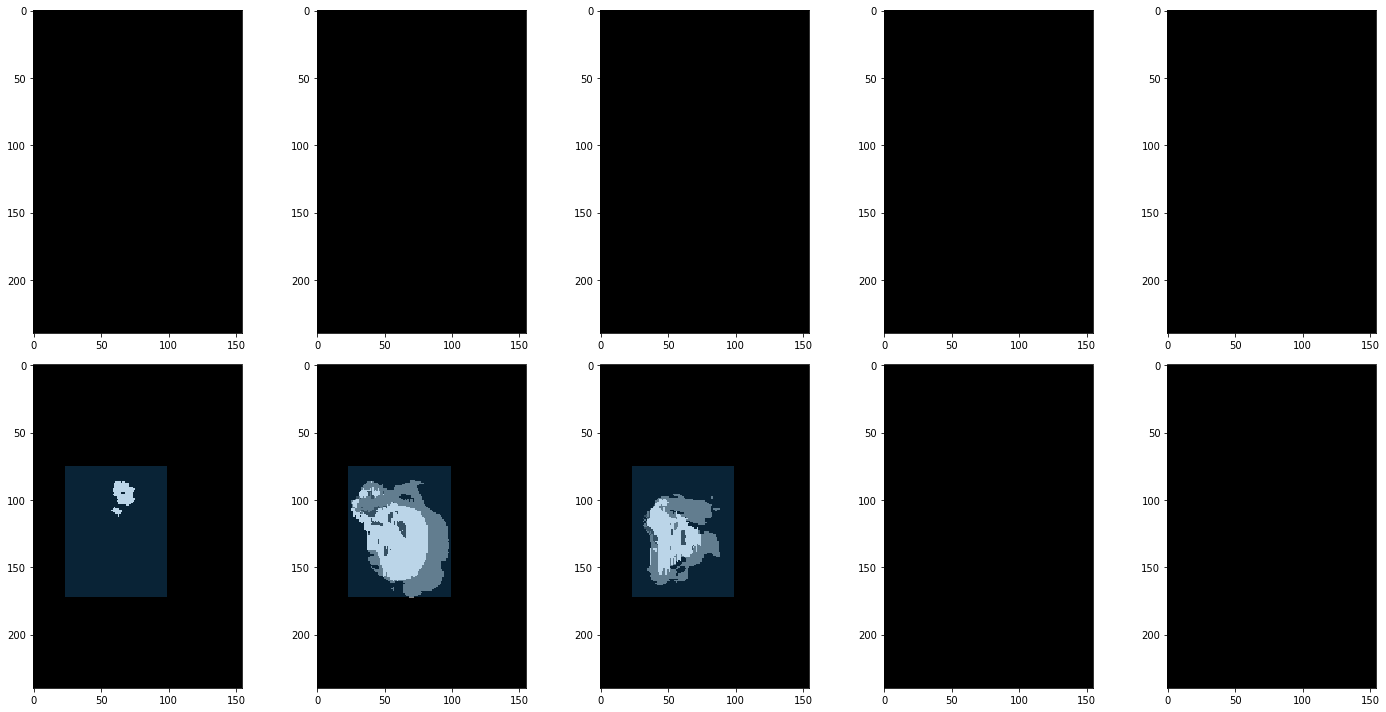

plotting along axis 1


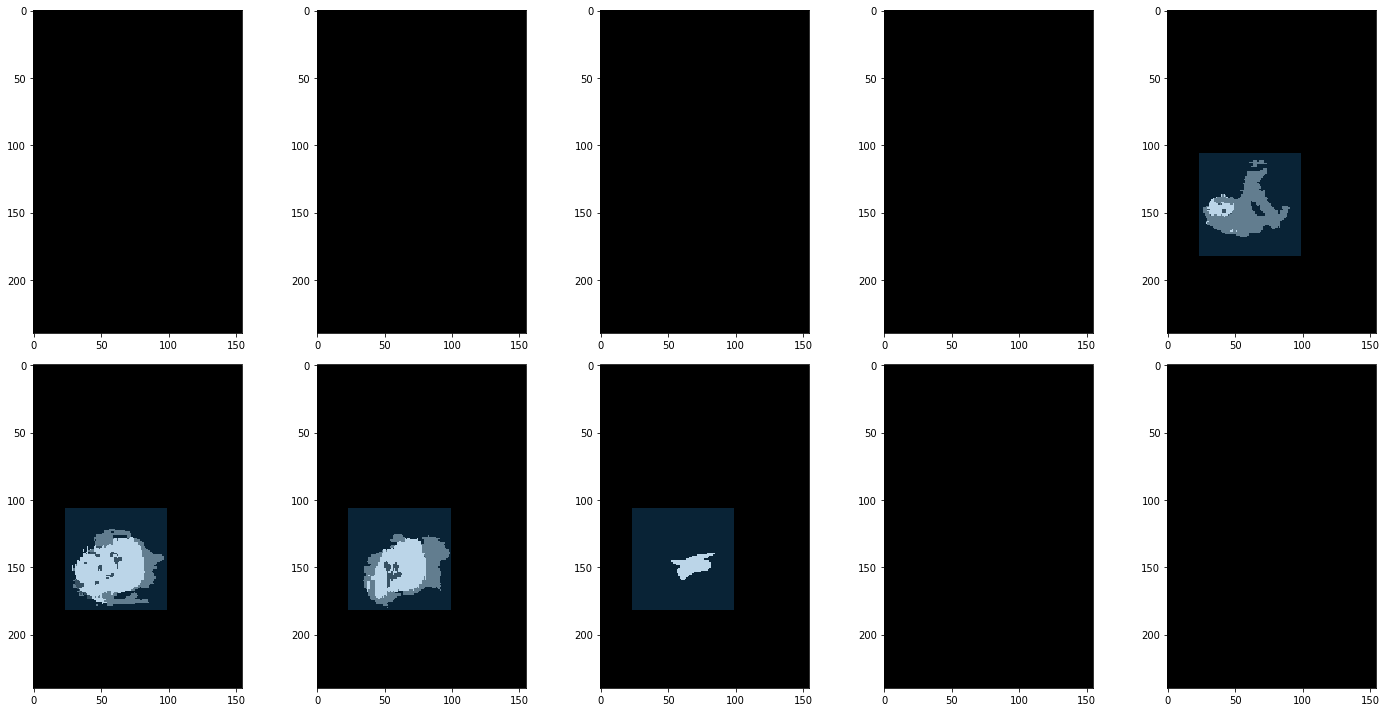

plotting along axis 2


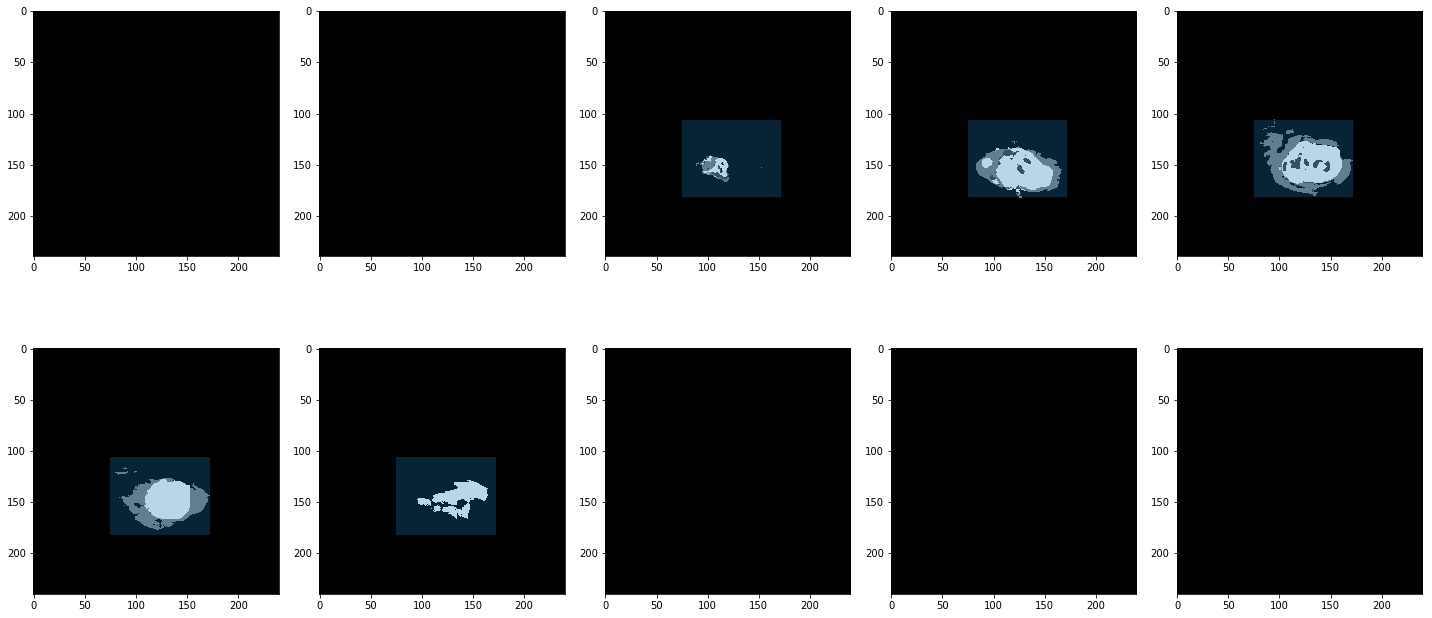

plotting along axis 0


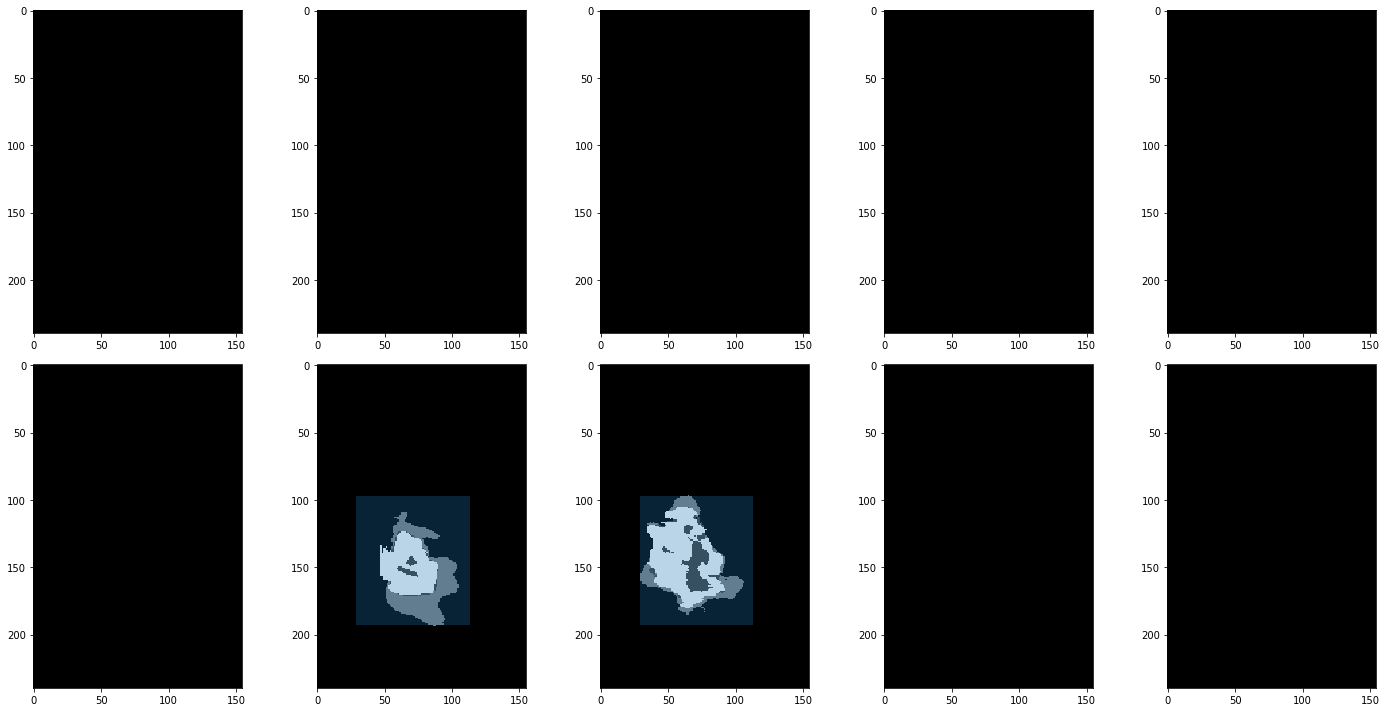

plotting along axis 1


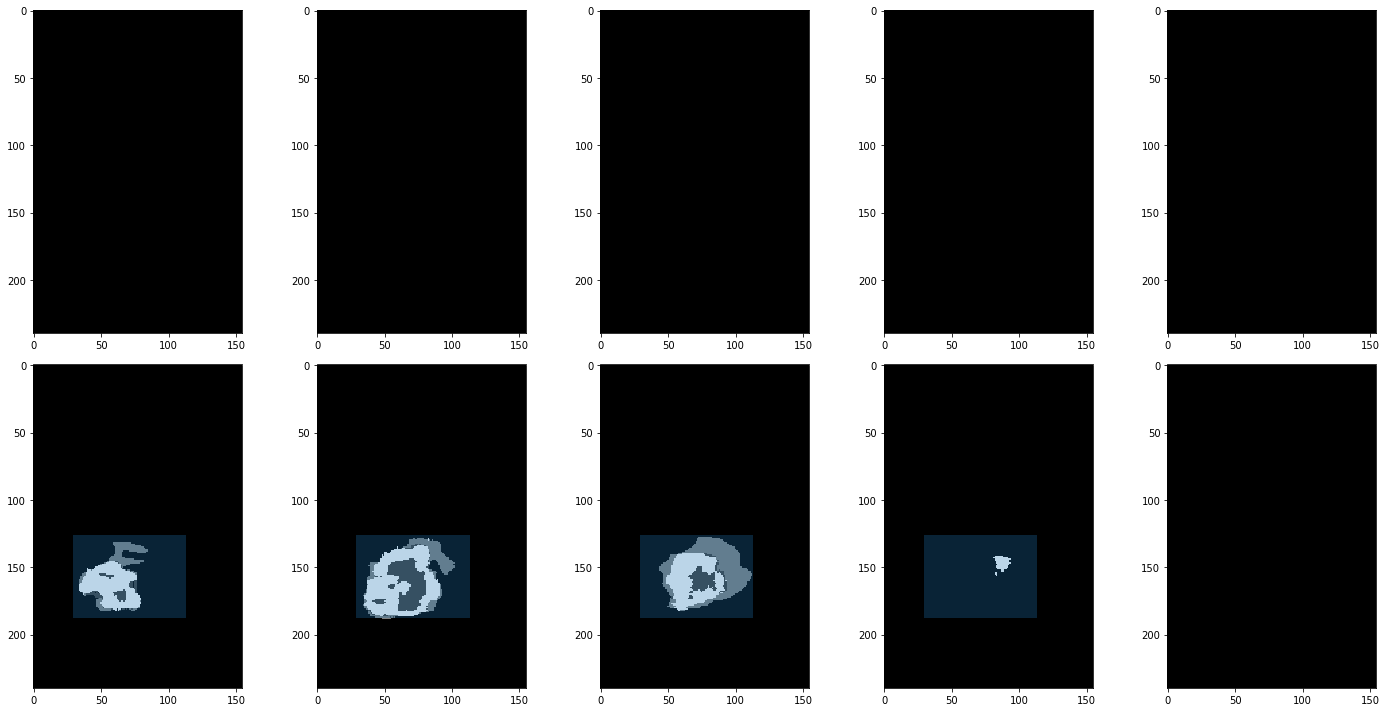

plotting along axis 2


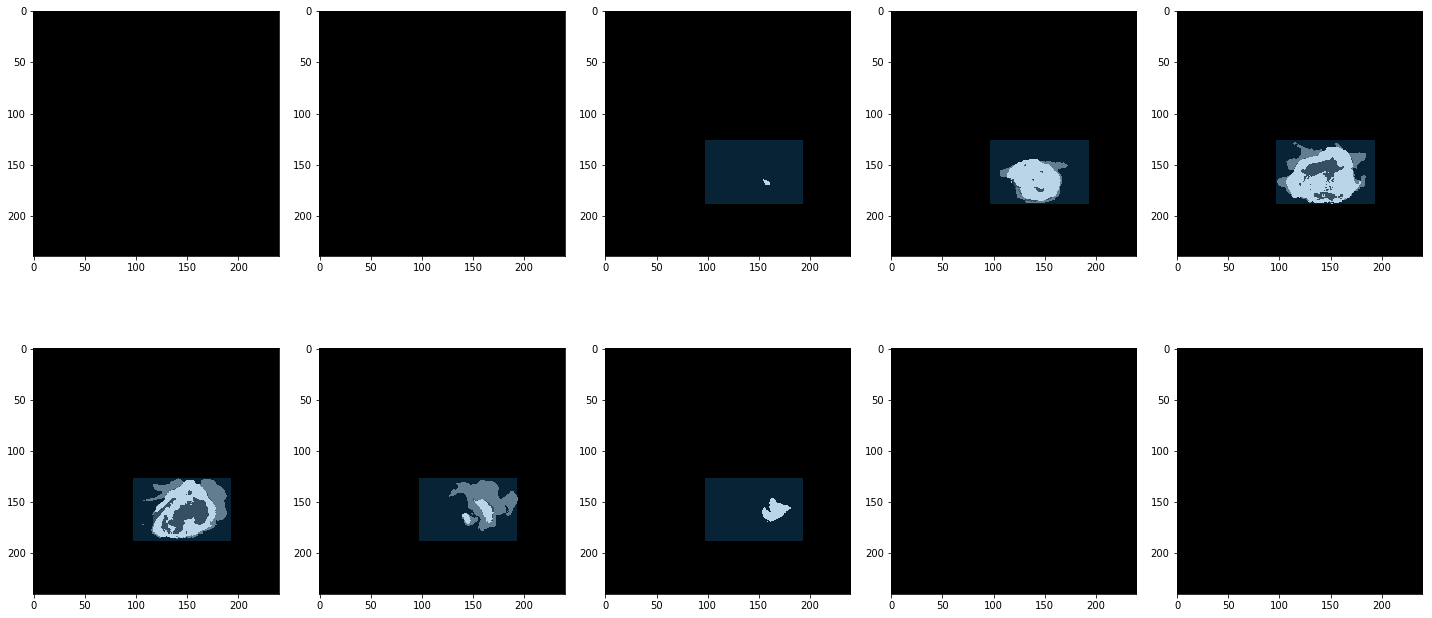

plotting along axis 0


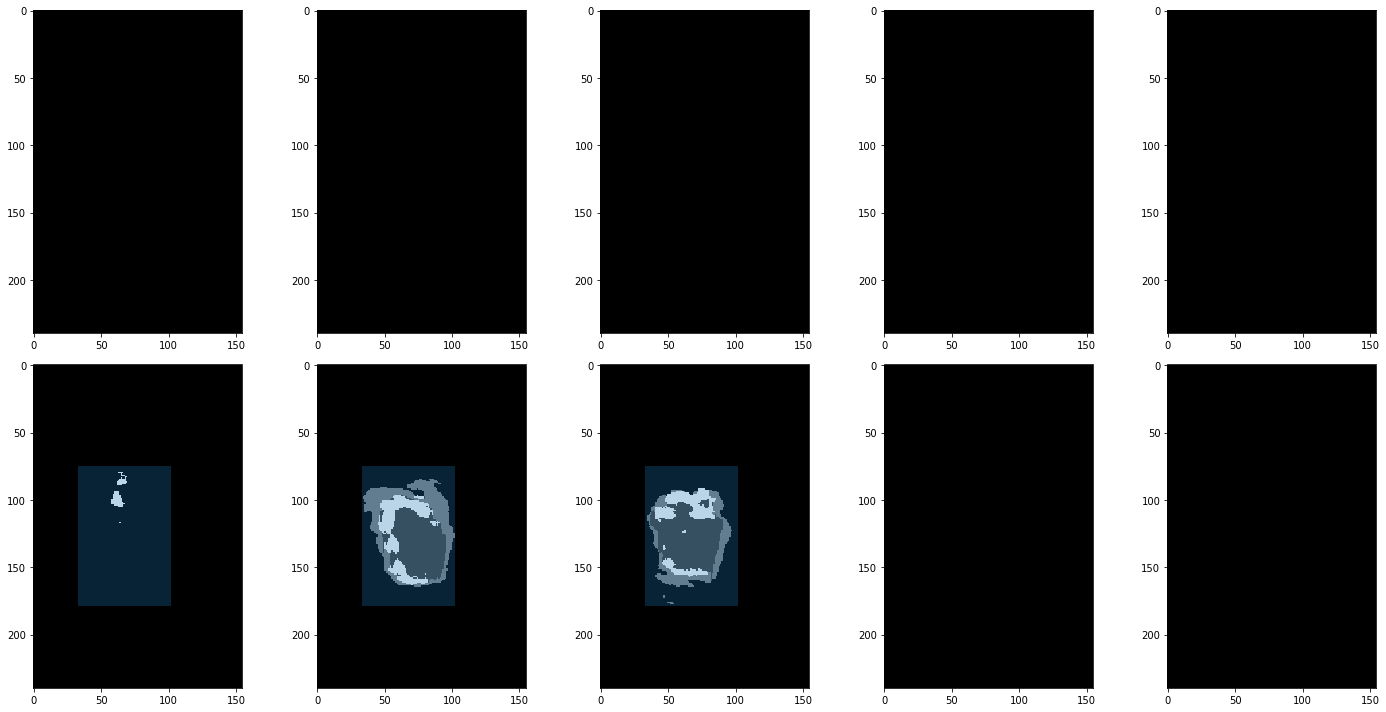

plotting along axis 1


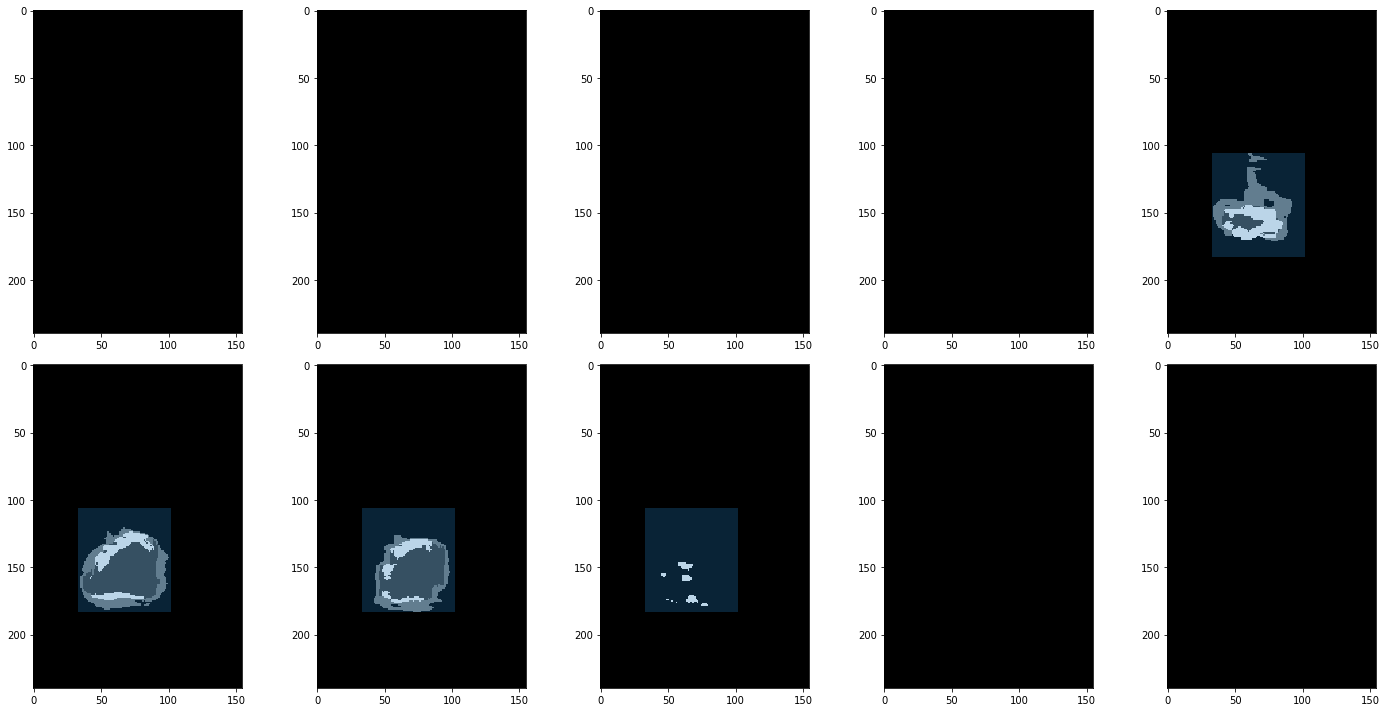

plotting along axis 2


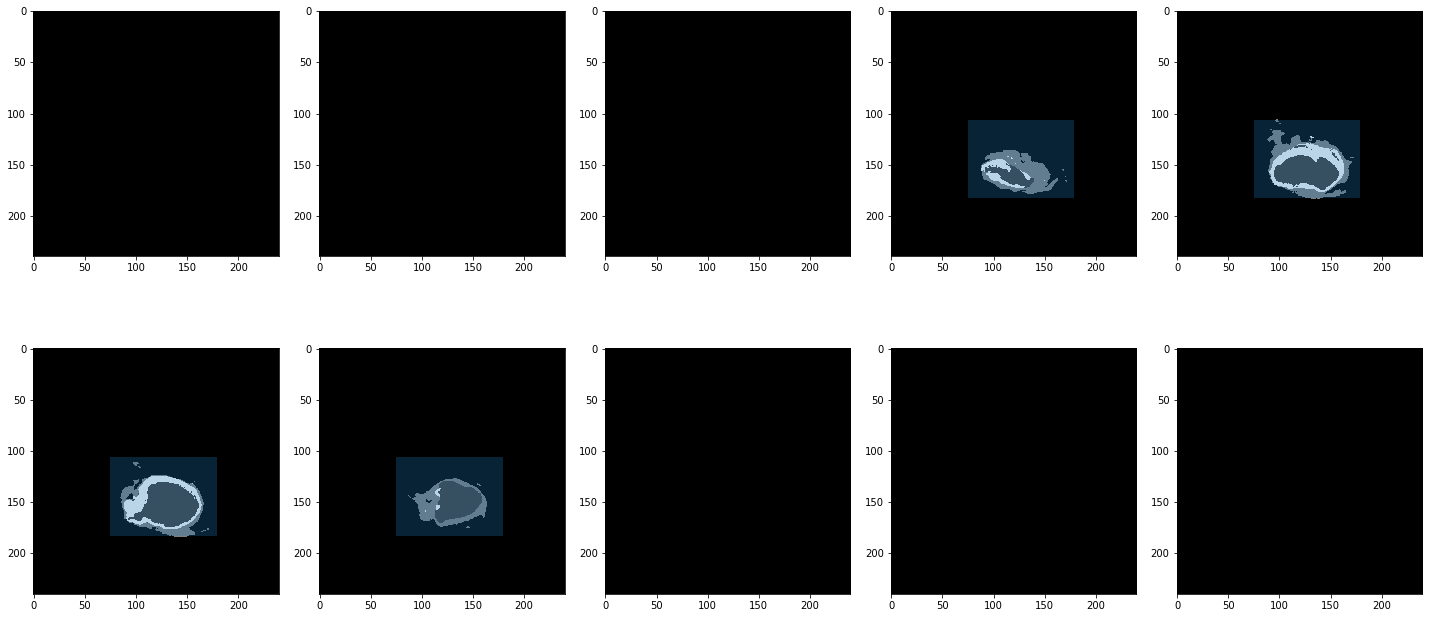

plotting along axis 0


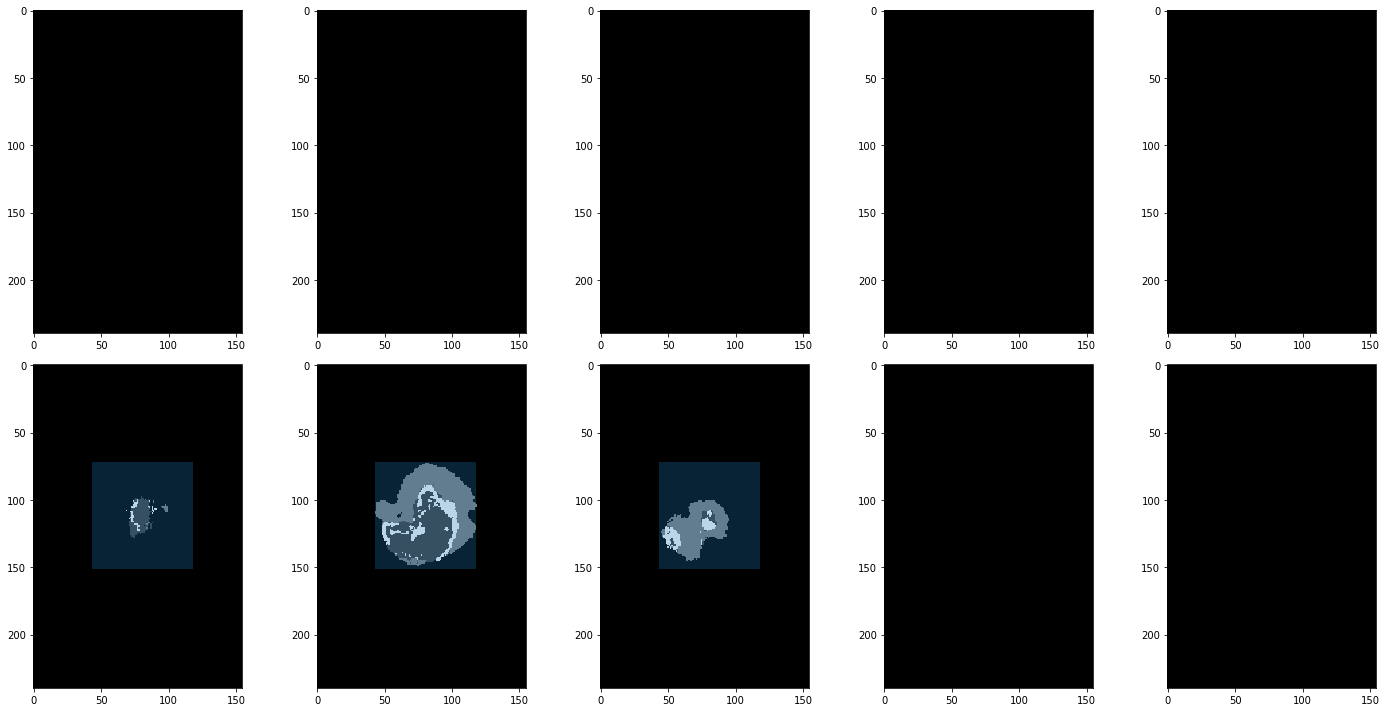

plotting along axis 1


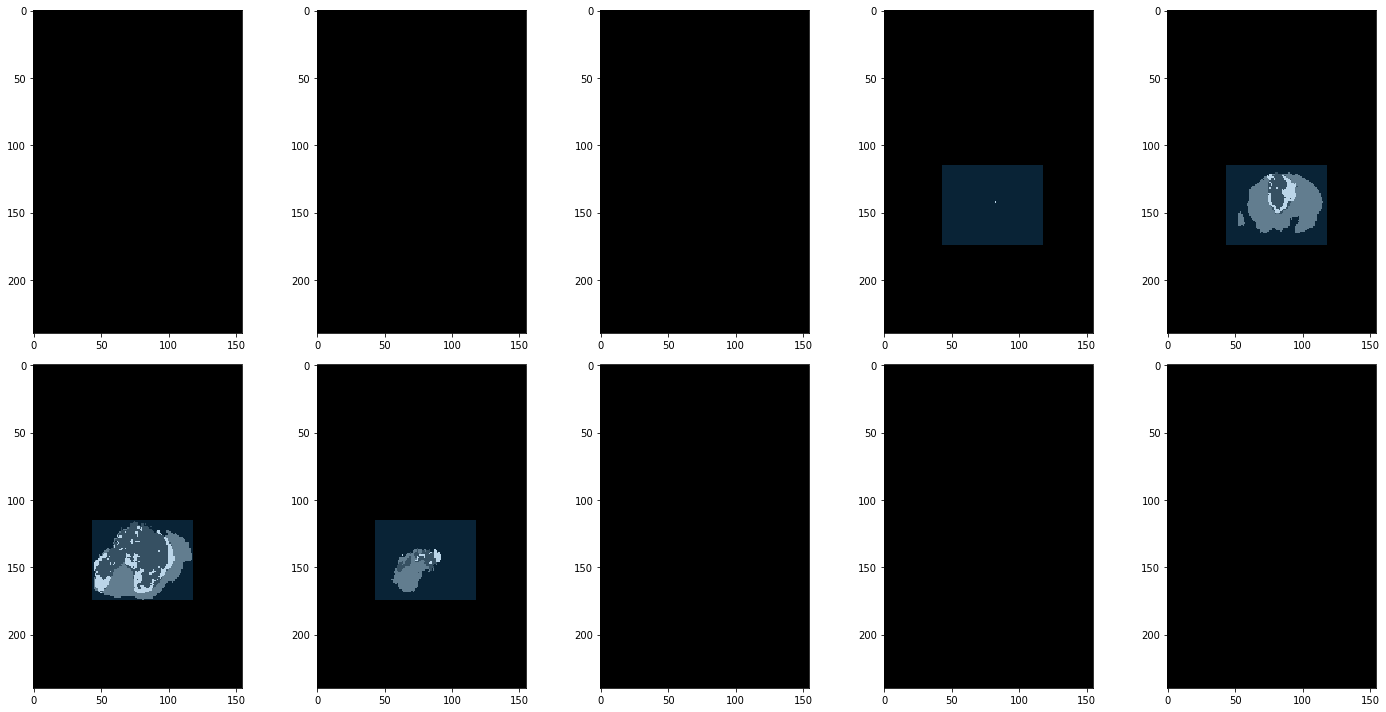

plotting along axis 2


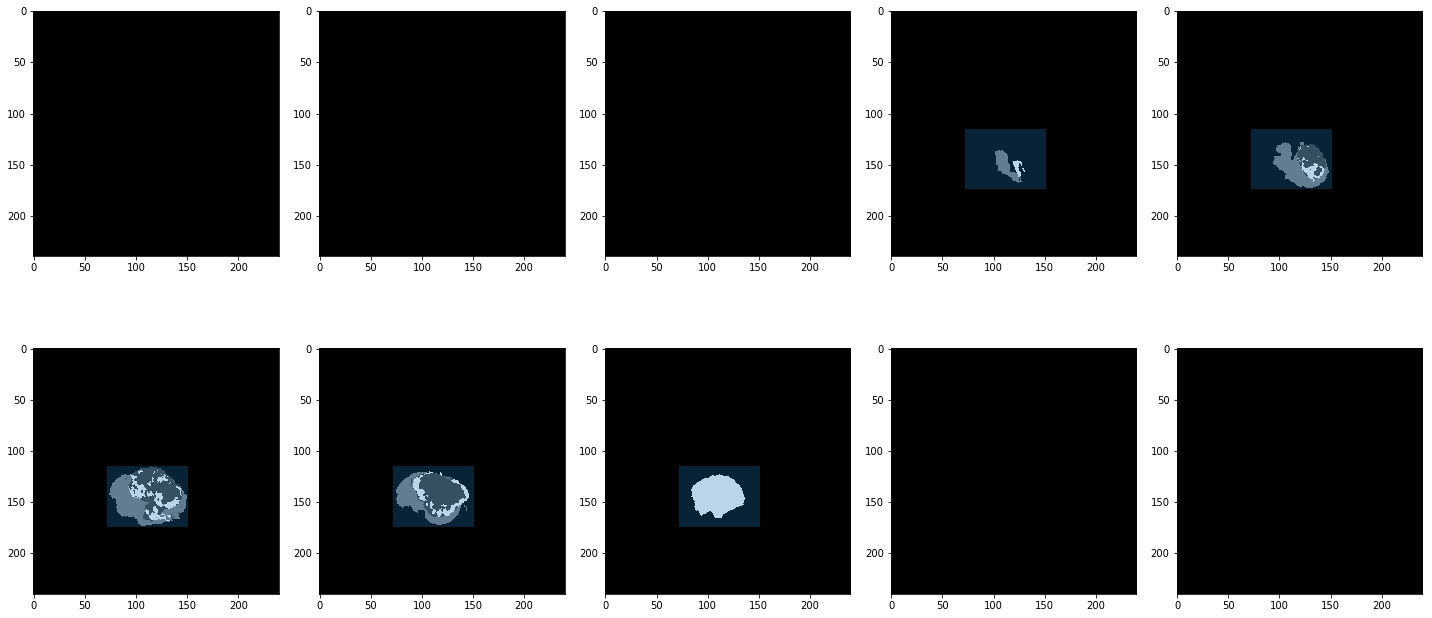

plotting along axis 0


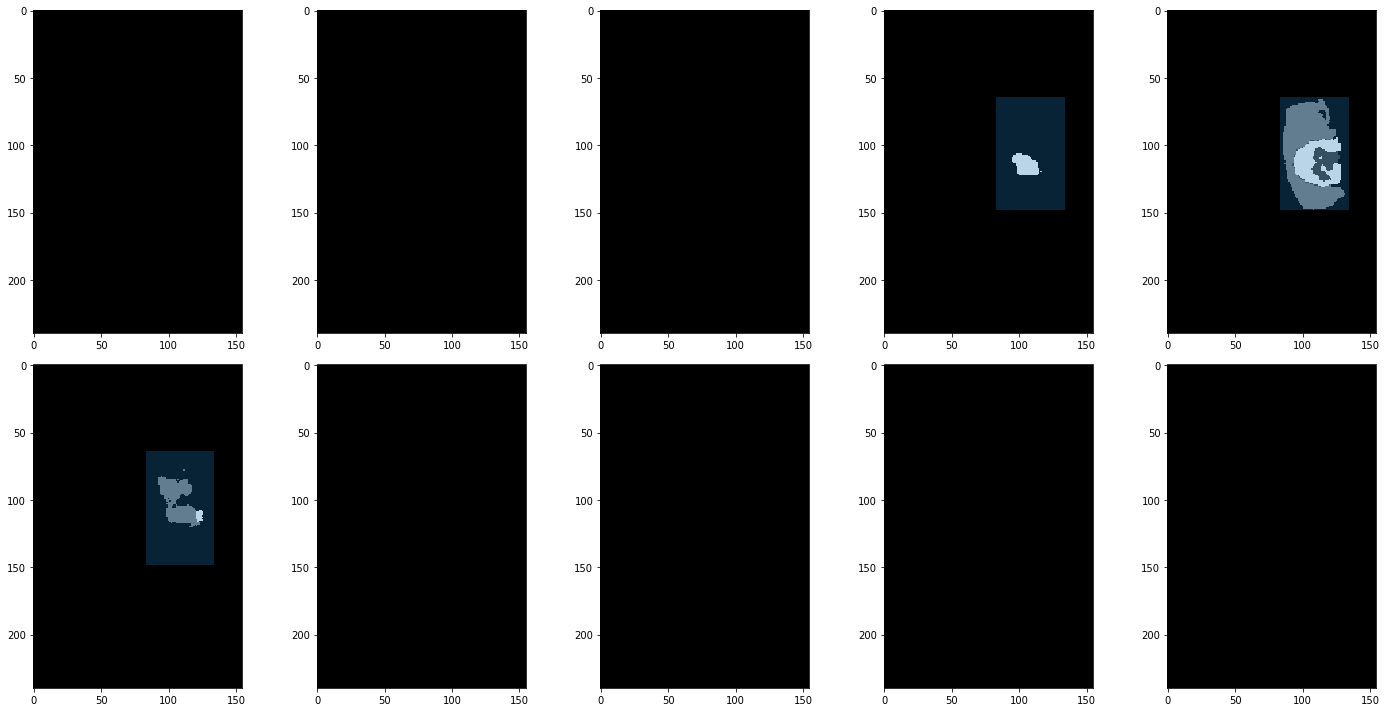

plotting along axis 1


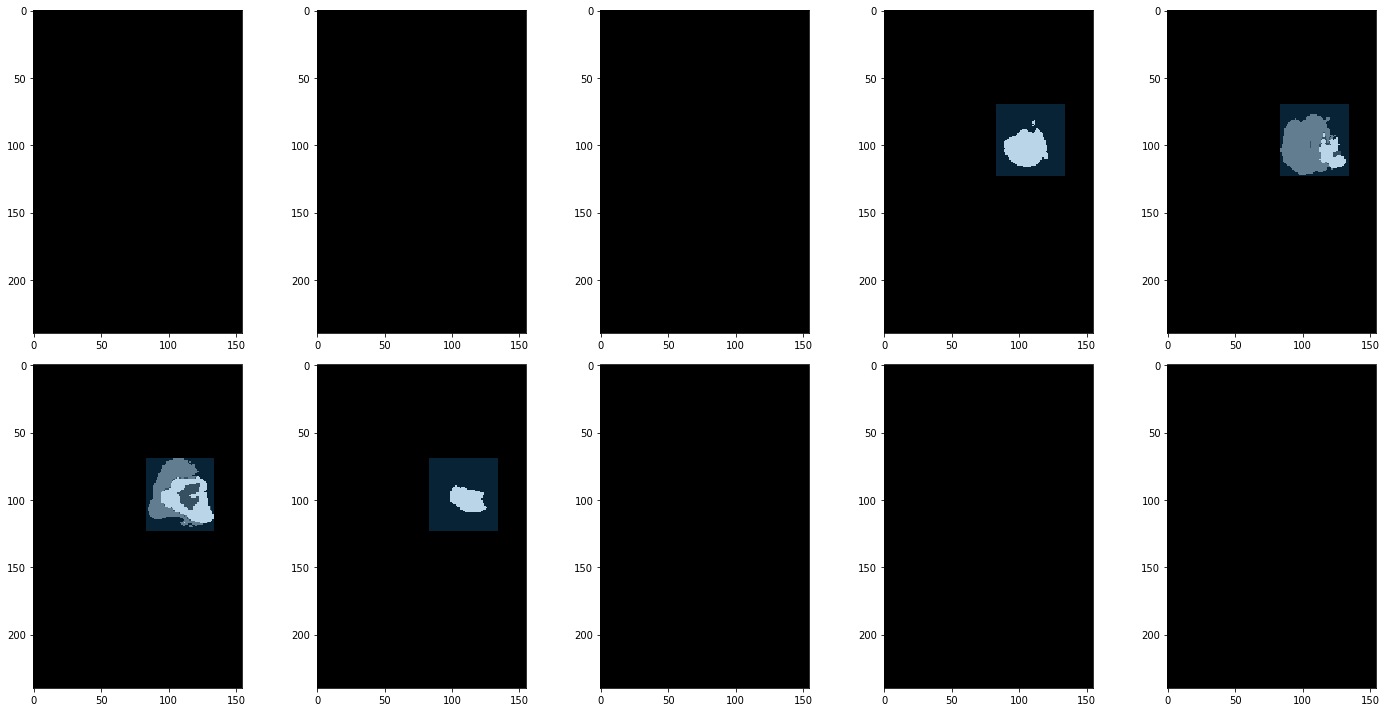

plotting along axis 2


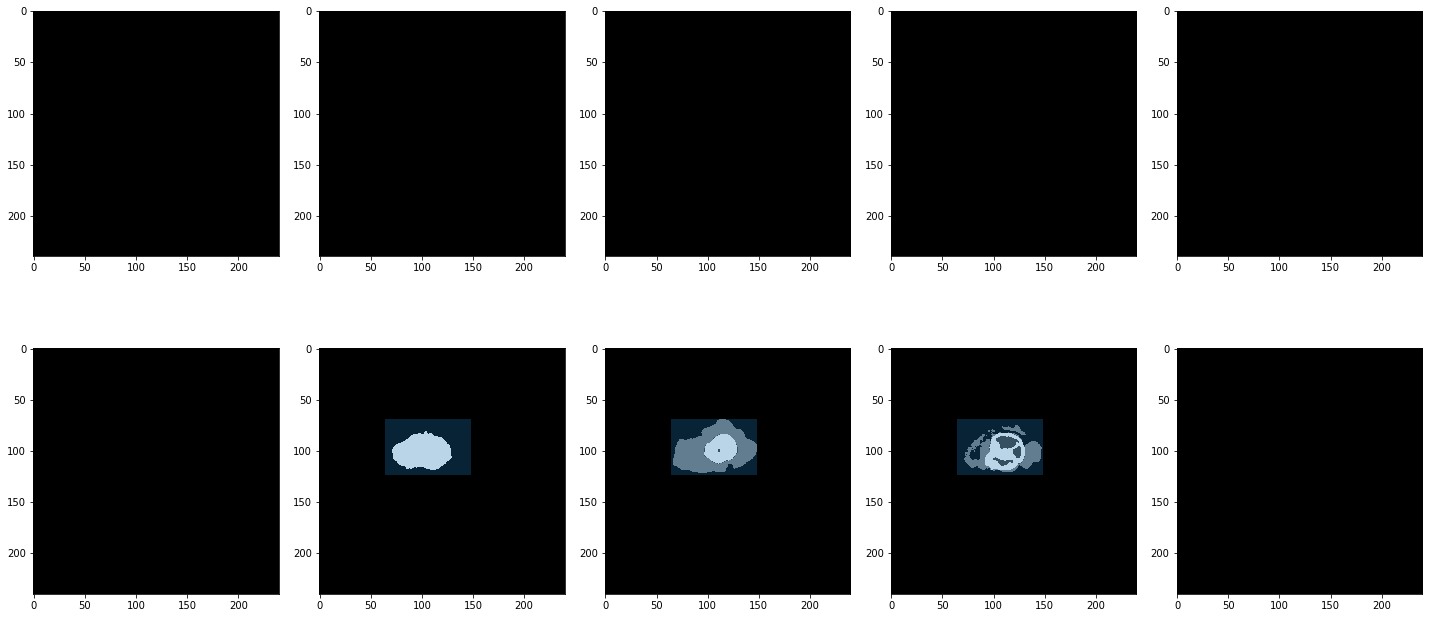

In [14]:
for k in range(0,100,10):
    print('='*100)
    viewRectangleInAllSegViews(hdf5_file["training_data_segmasks_hgg"][k], rect=Rect3D(hdf5_file["bounding_box_hgg"][k]))

In [1]:
import h5py
import sys
sys.path.append('..')
from modules.configfile import config
from modules import dataloader
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)
import glob, os

In [2]:
import matplotlib.pyplot as plt
hdf5_file = h5py.File(config['hdf5_filepath_prefix'], mode='r')

In [3]:
hdf5_file.items()

[(u'original_data', <HDF5 group "/original_data" (8 members)>)]

NExt time, don't do this destructive operation. 

In [4]:
hdf5_file_g = hdf5_file['original_data']

In [ ]:
hdf5_file.close()

In [5]:
from modules.dataloader import standardize

In [ ]:
standardize(hdf5_file_g['training_data_hgg'])

visualizing the slices..


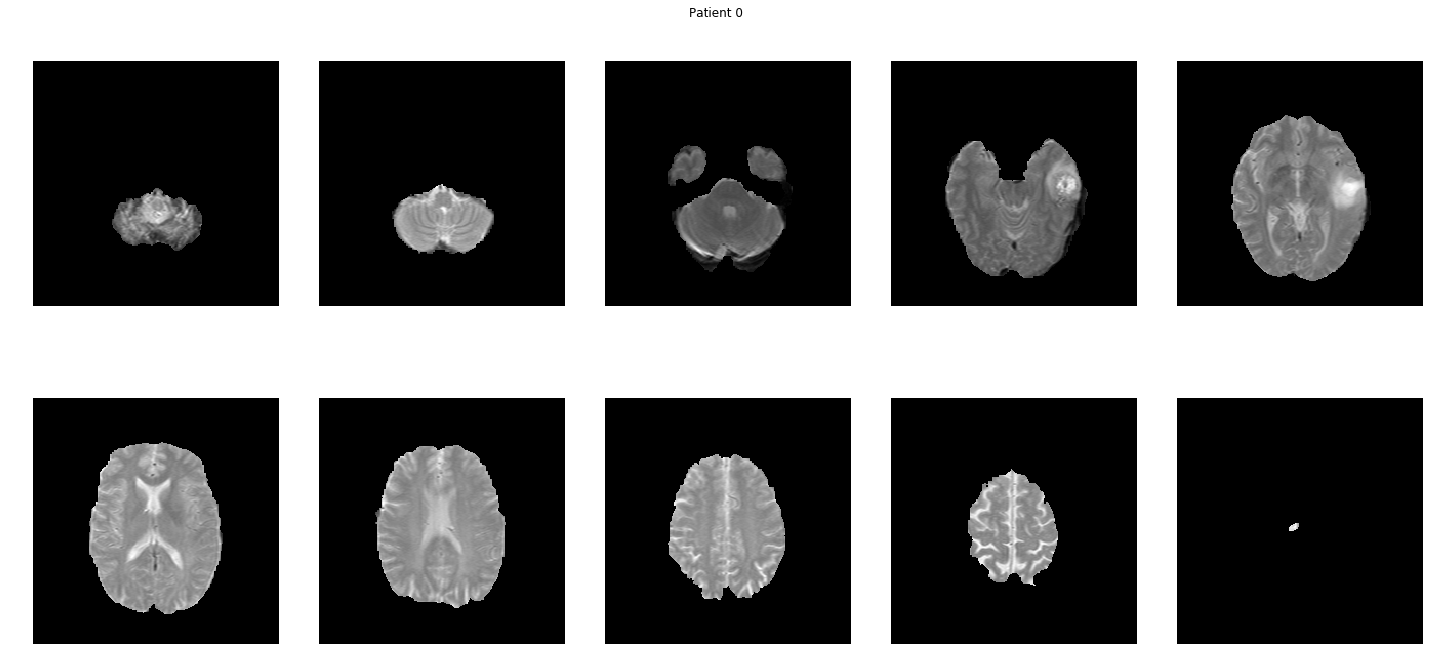

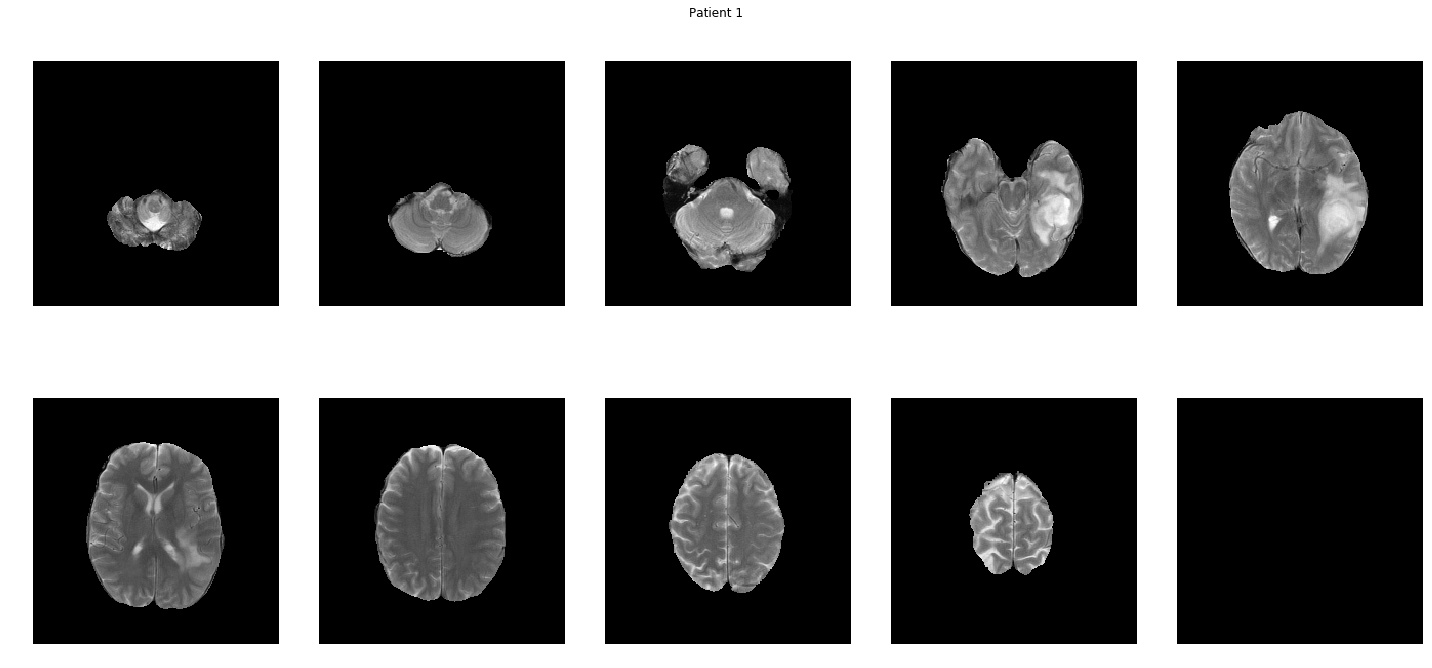

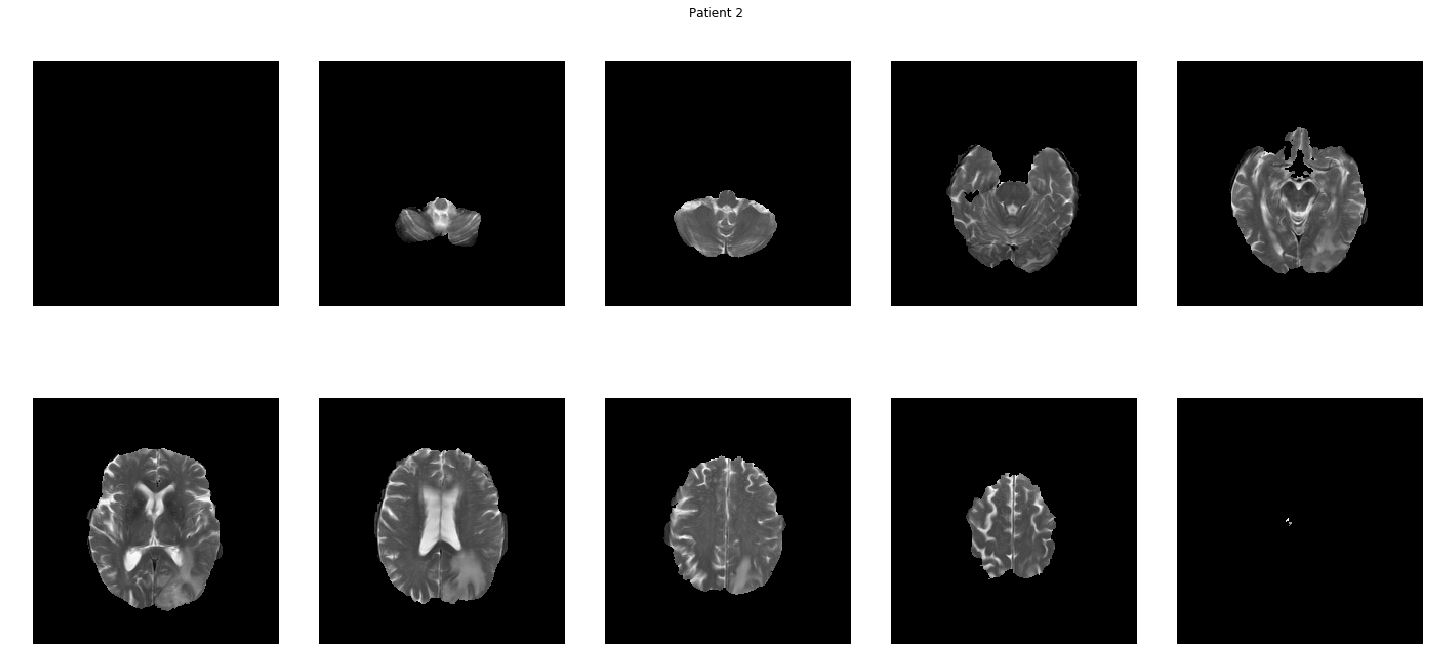

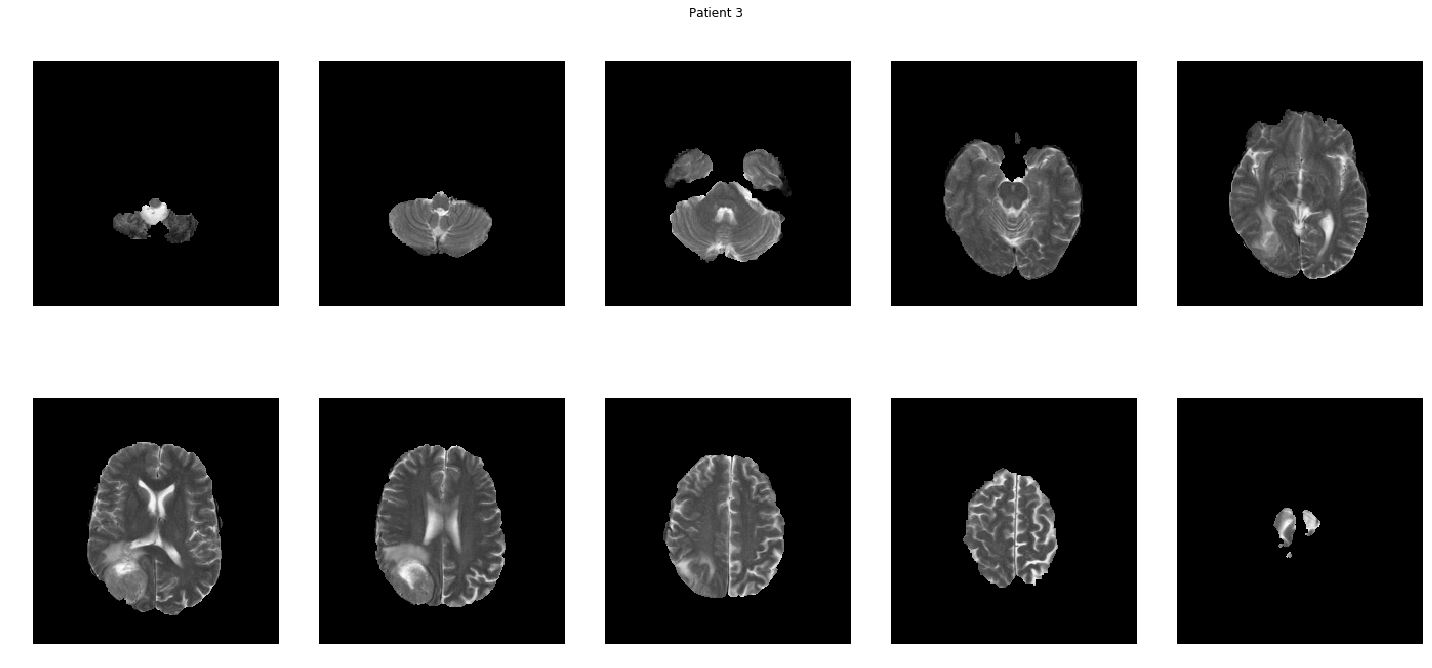

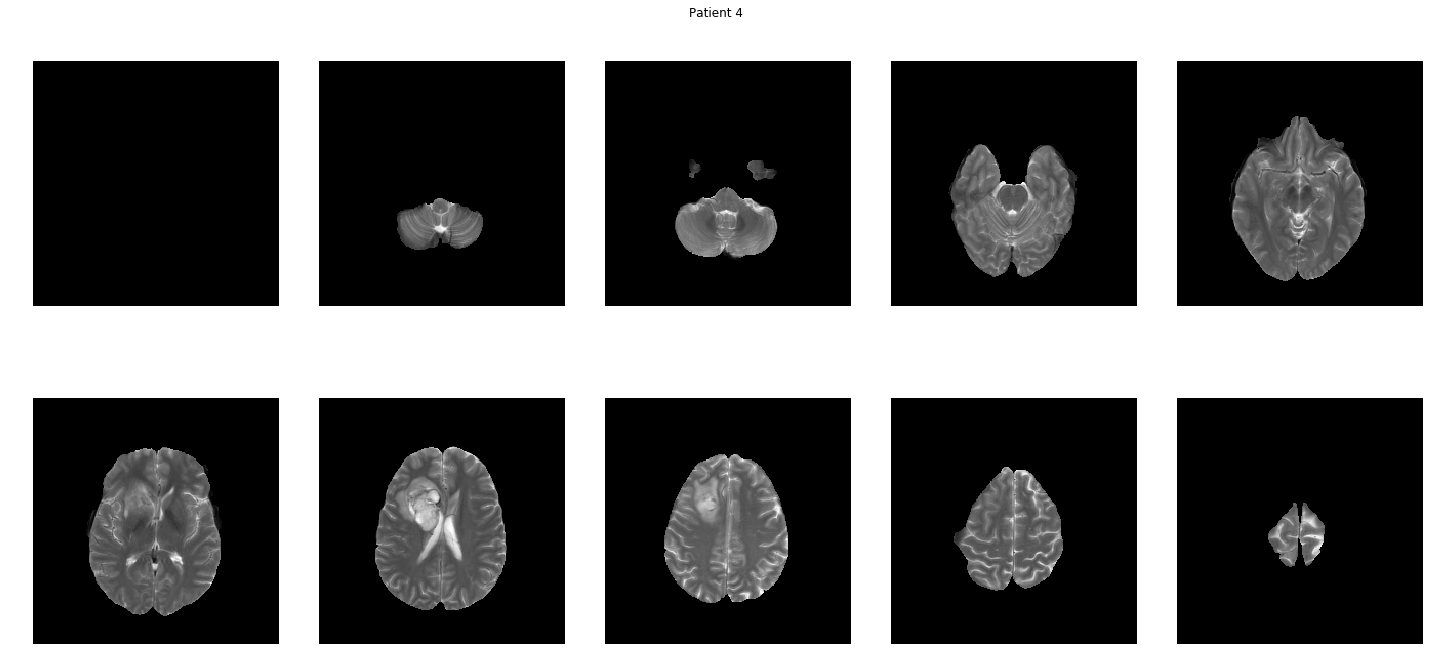

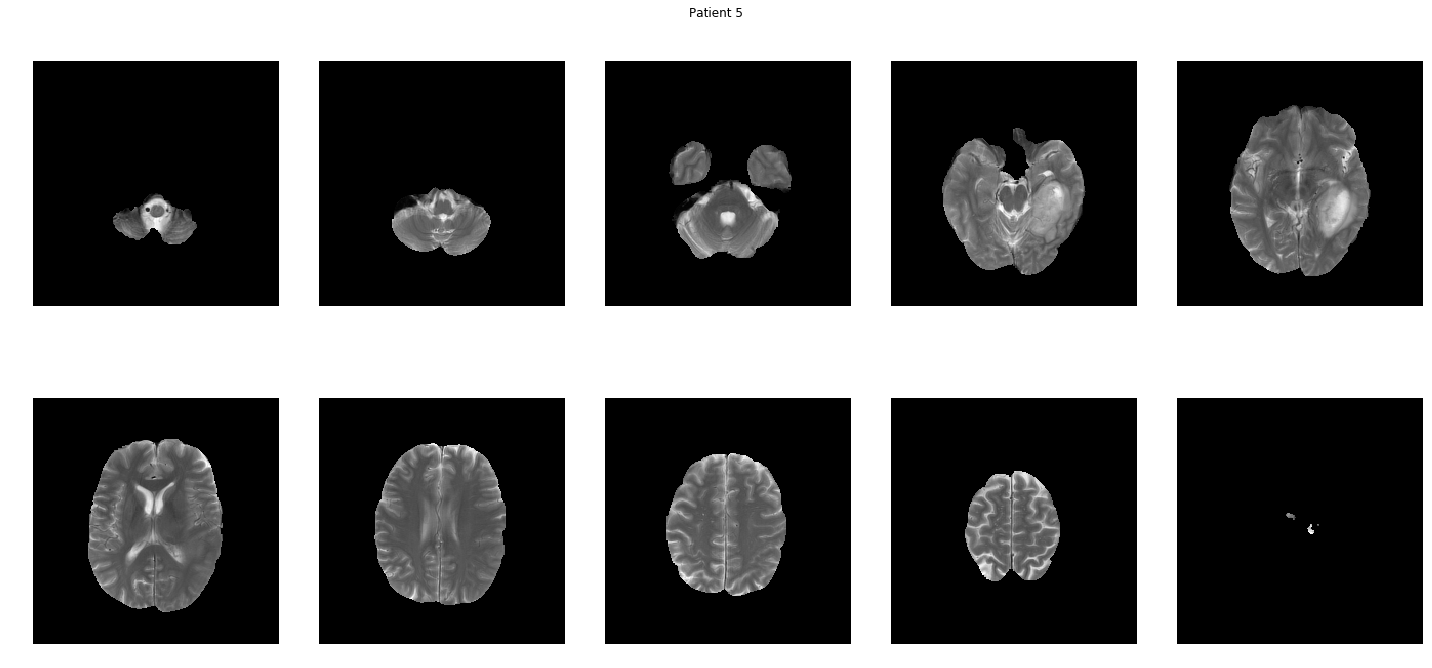

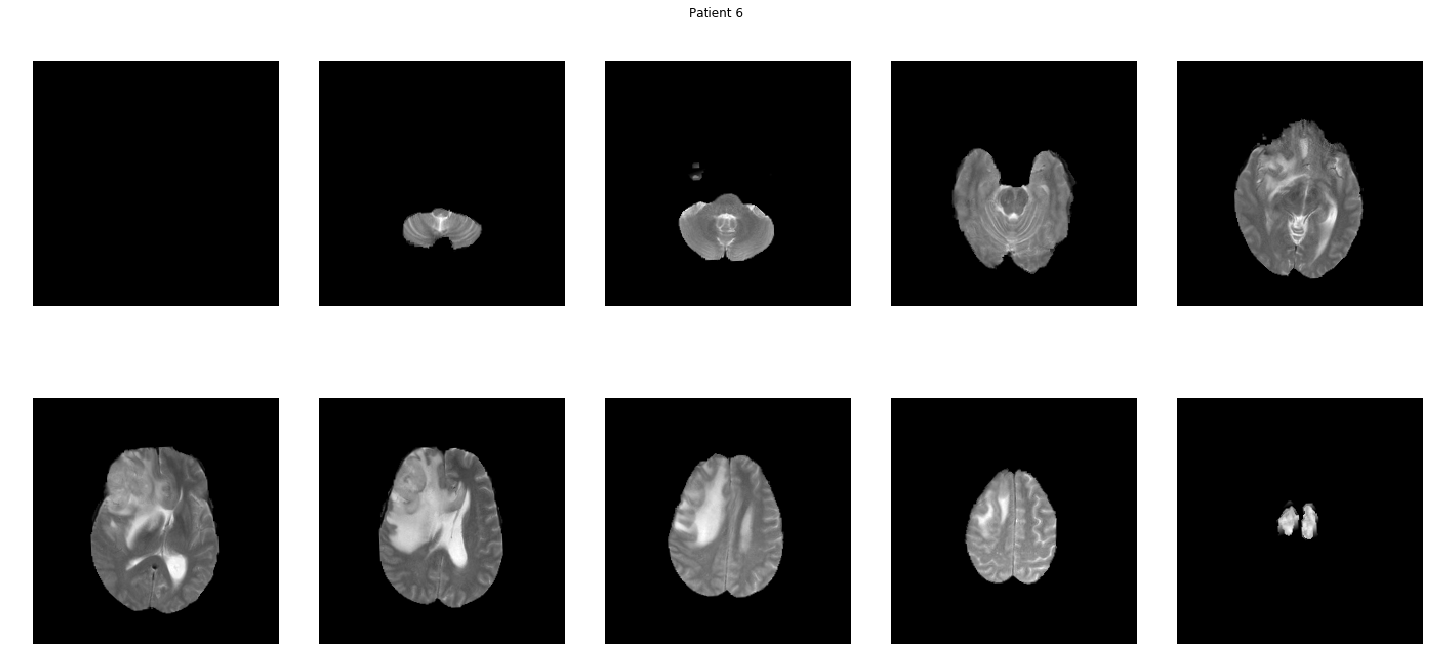

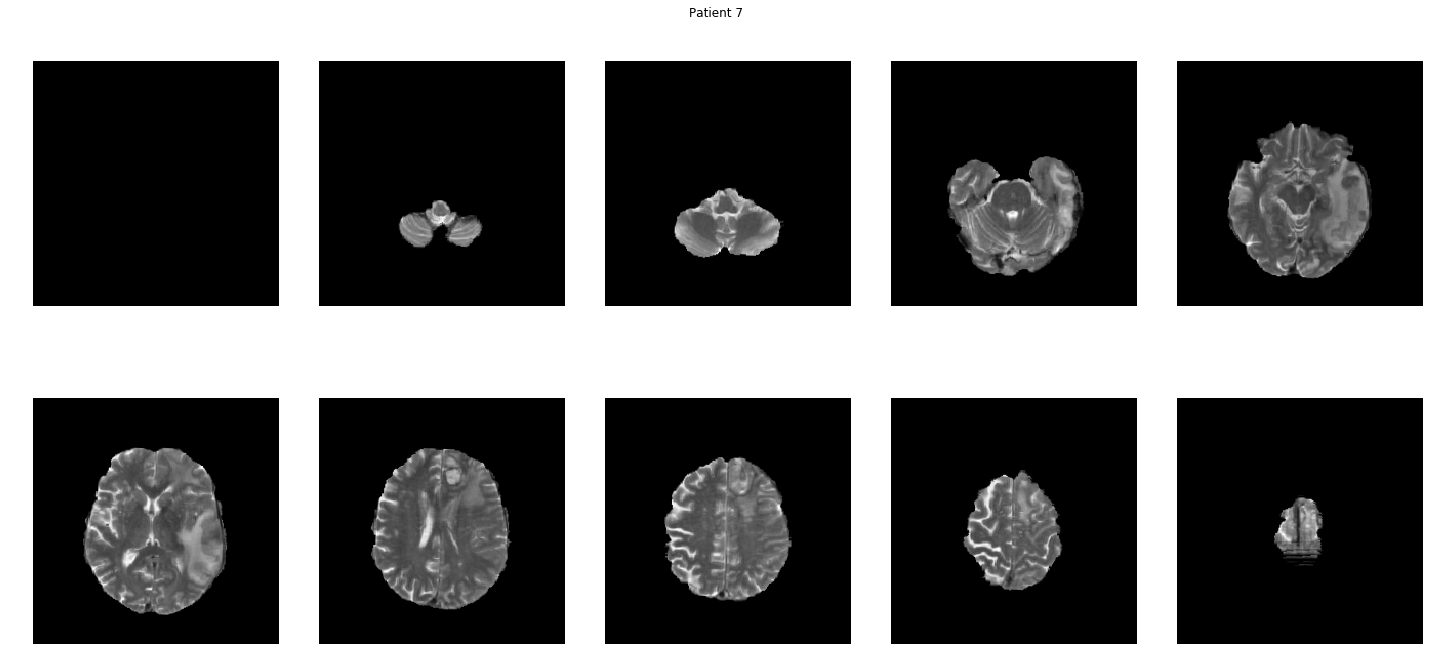

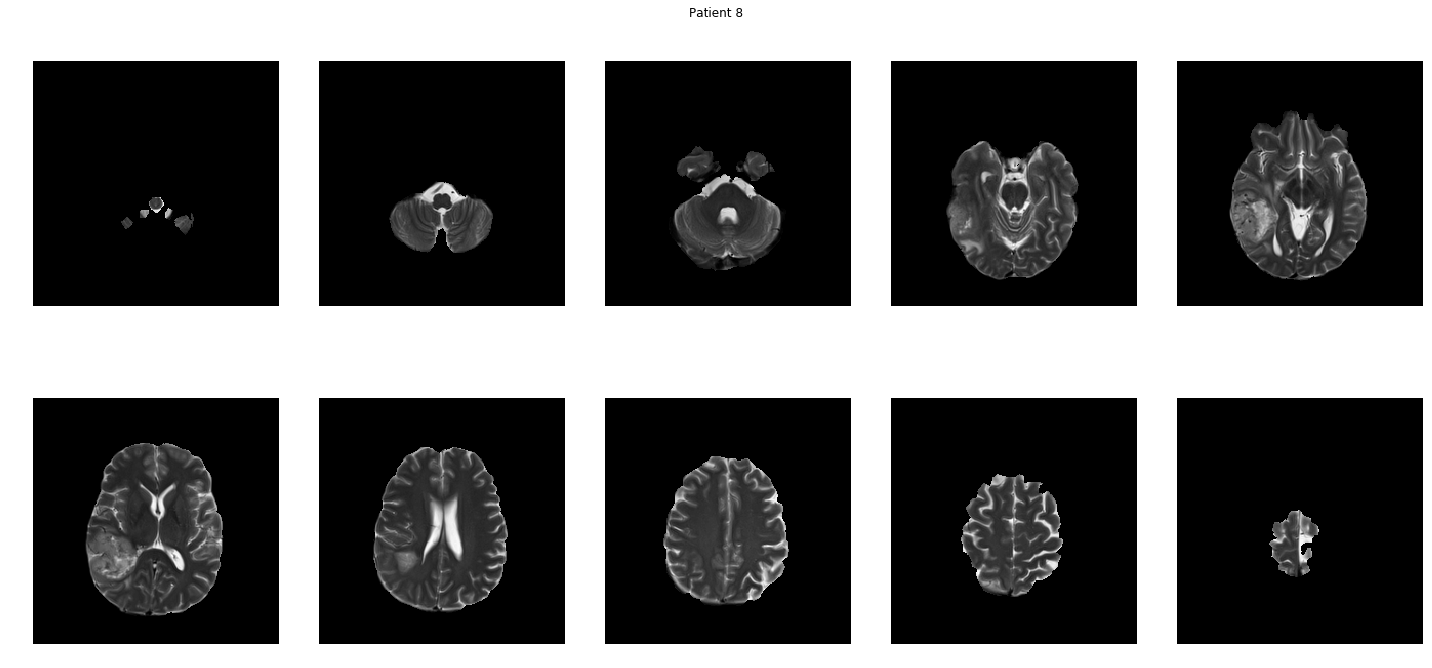

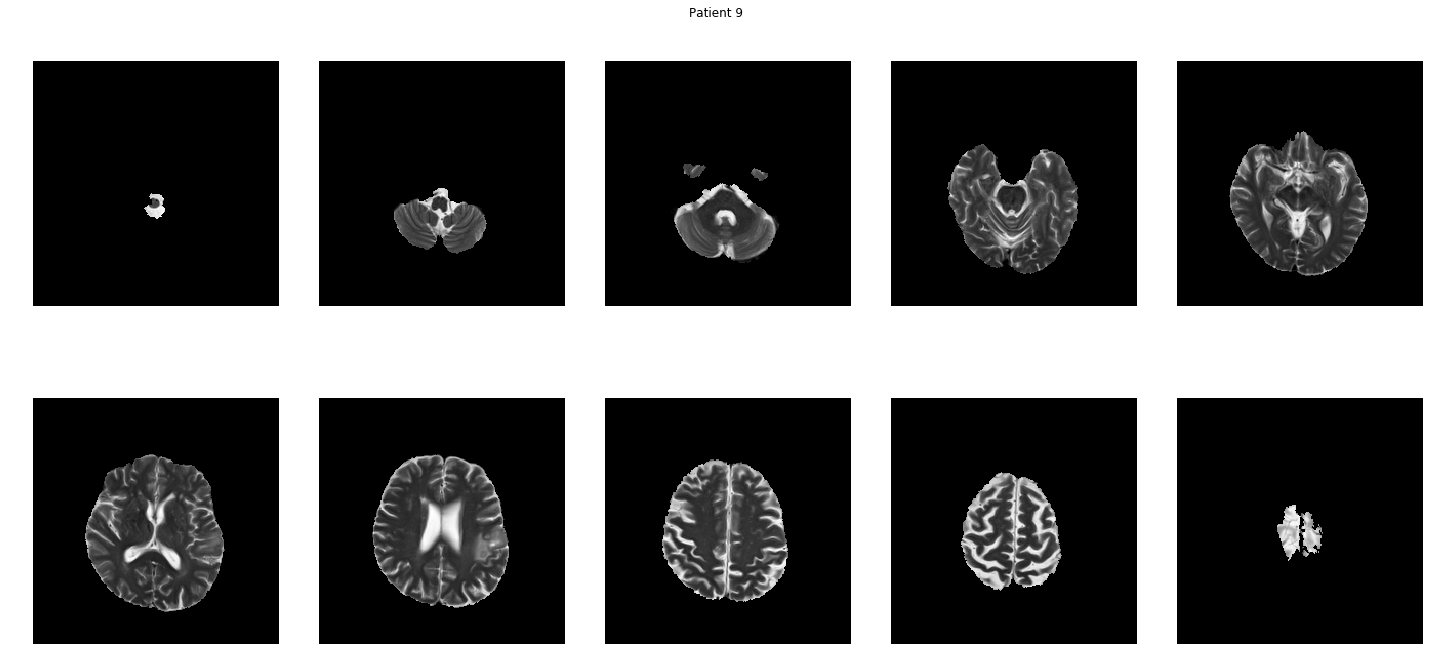

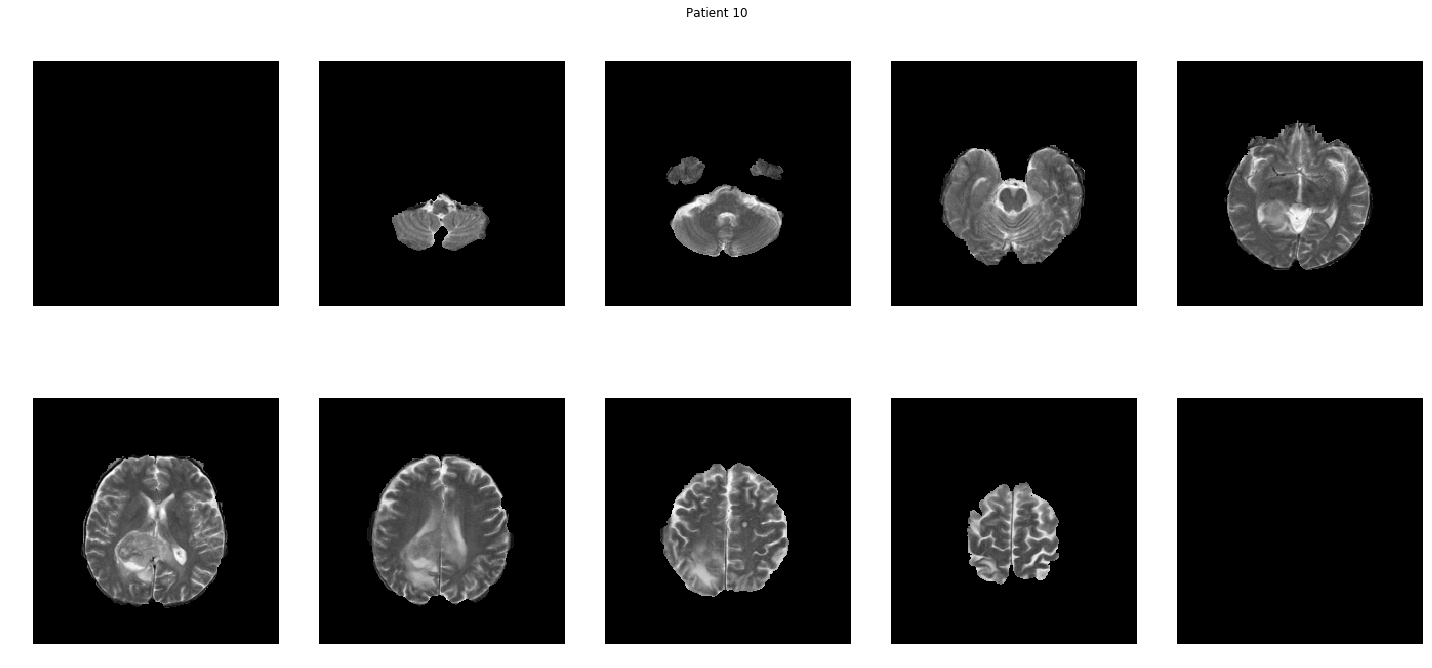

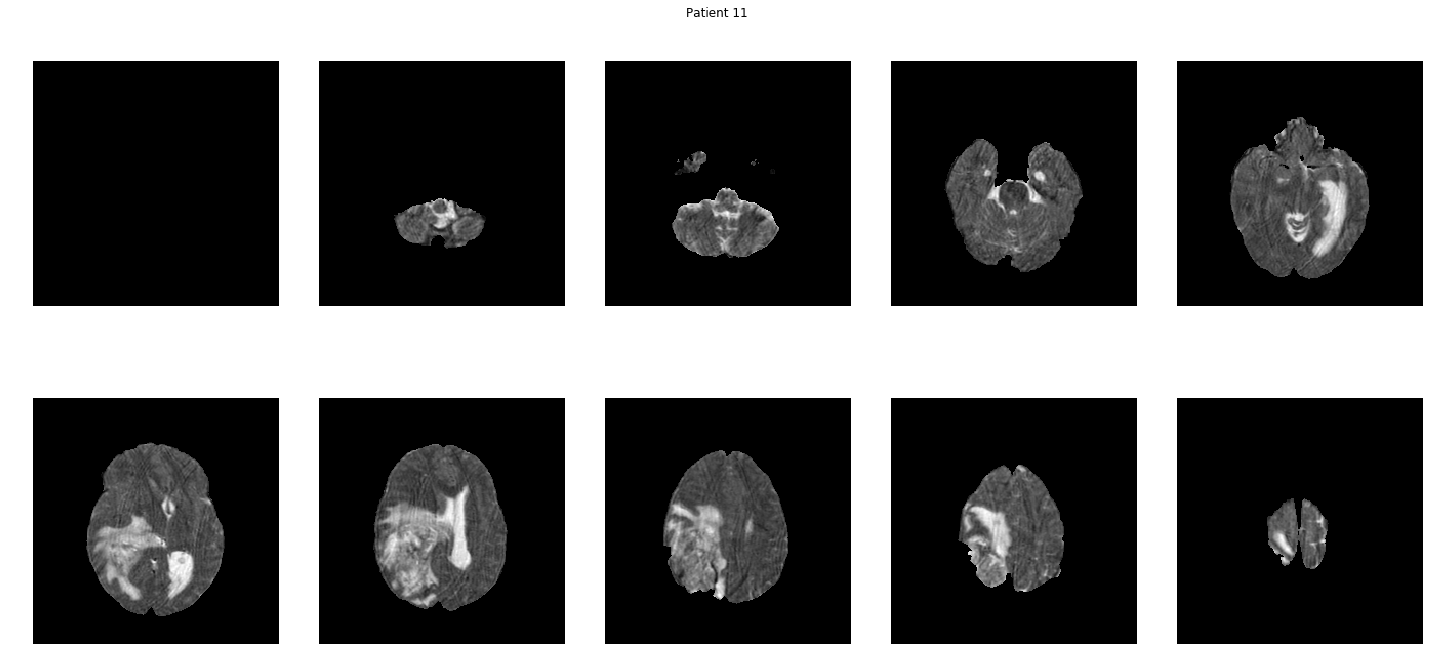

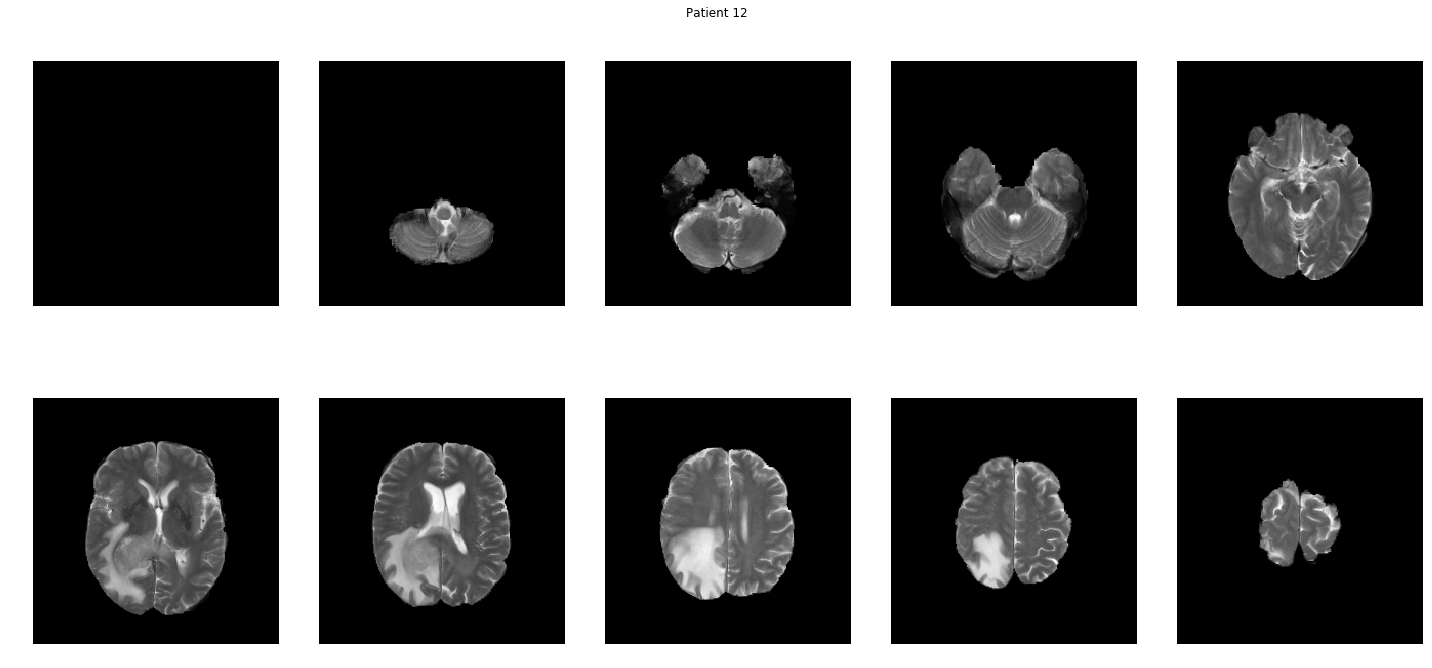

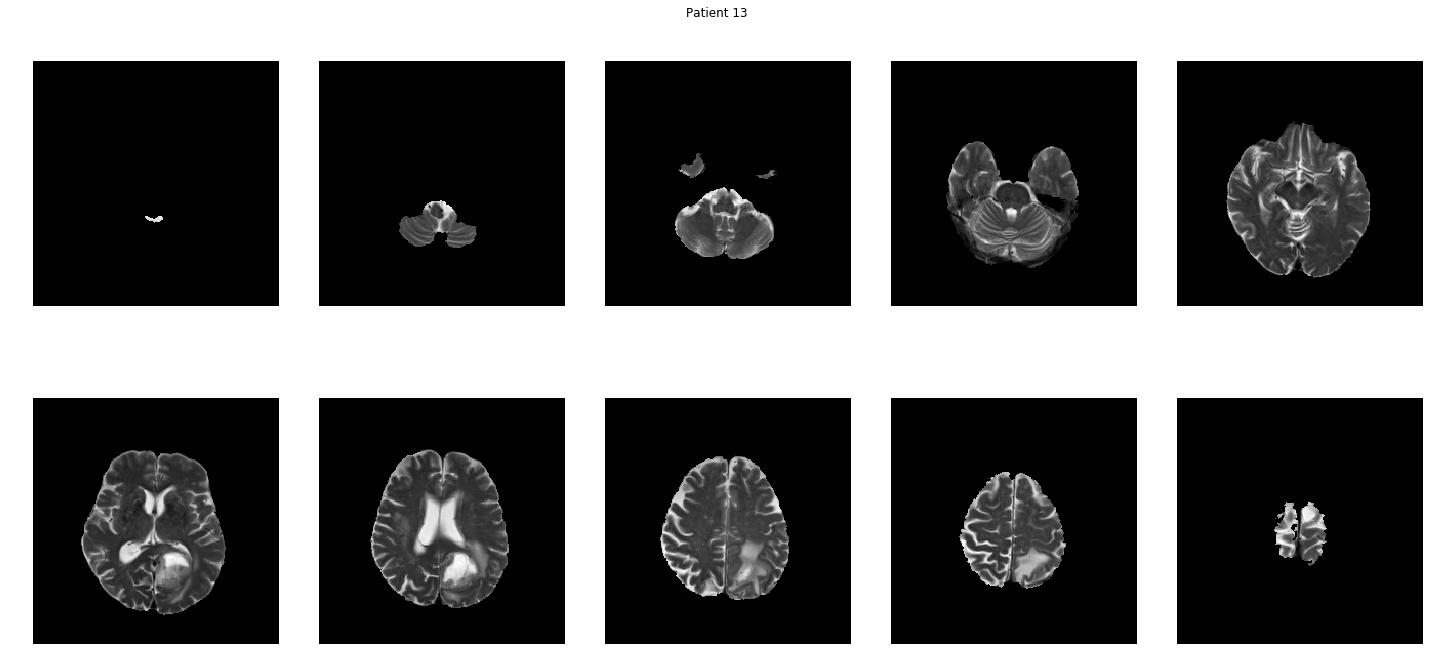

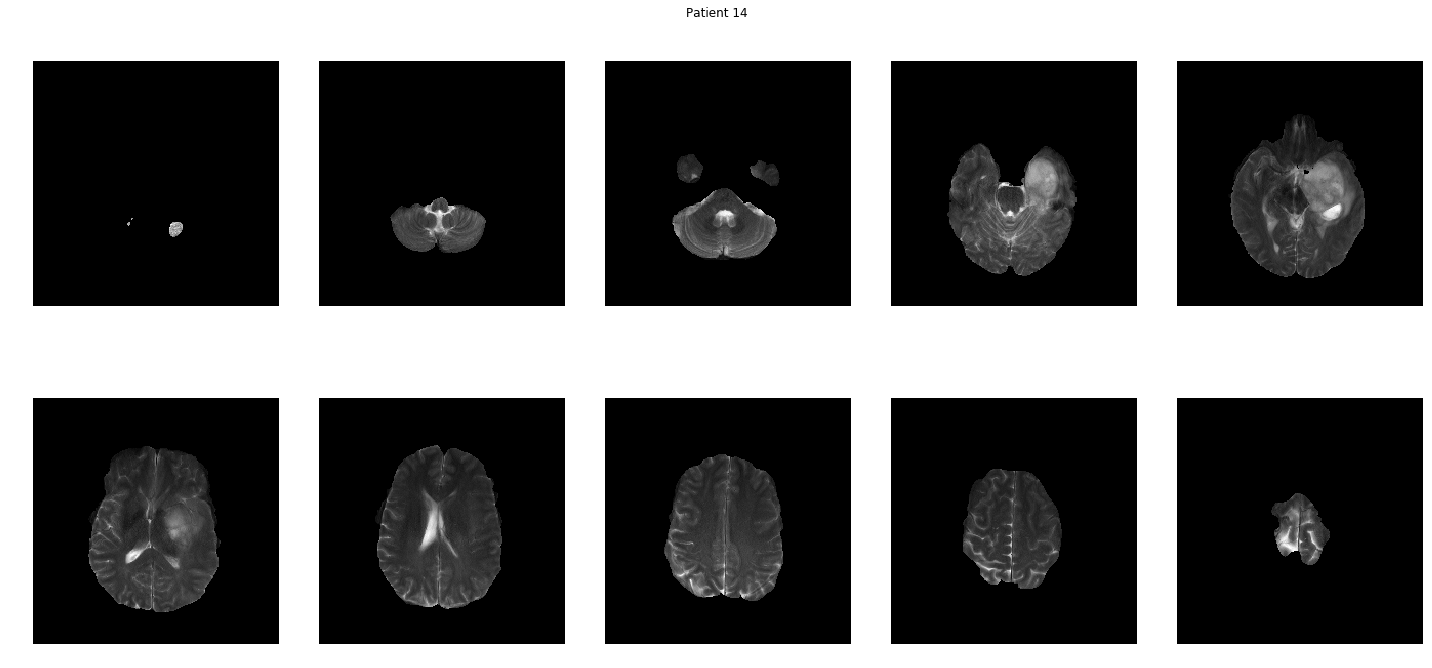

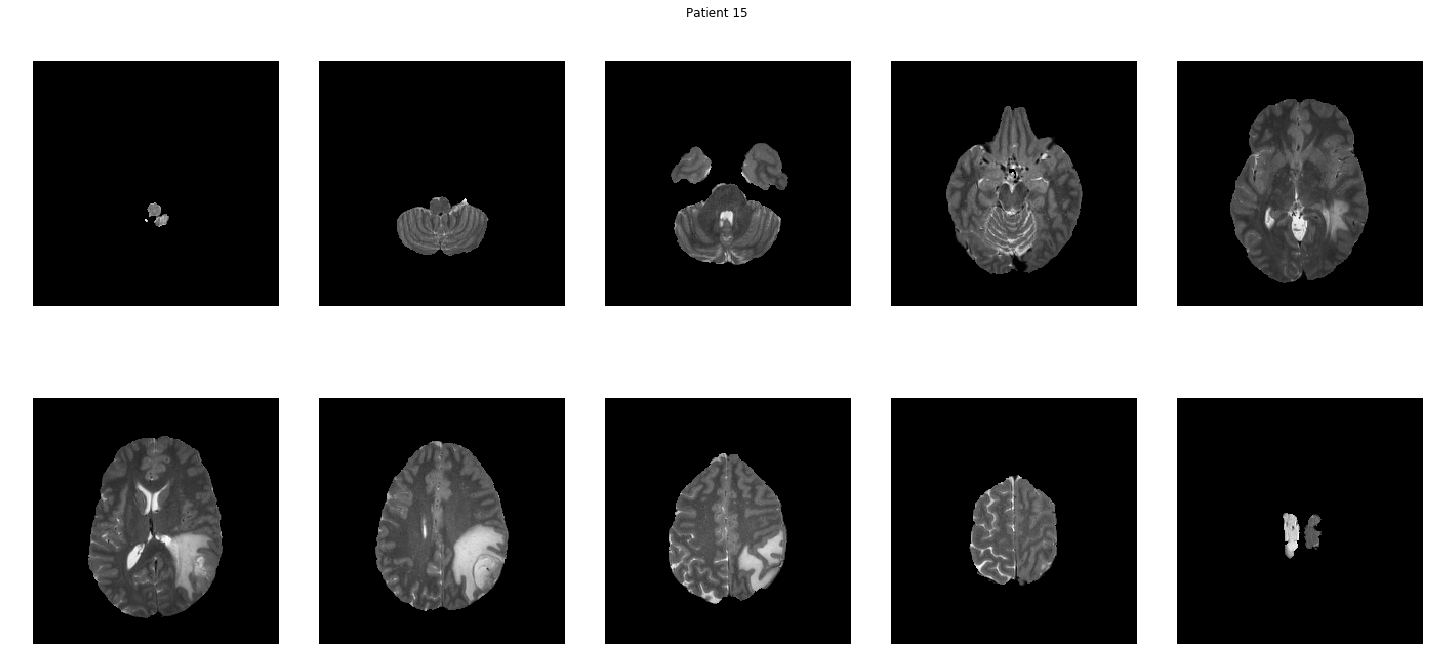

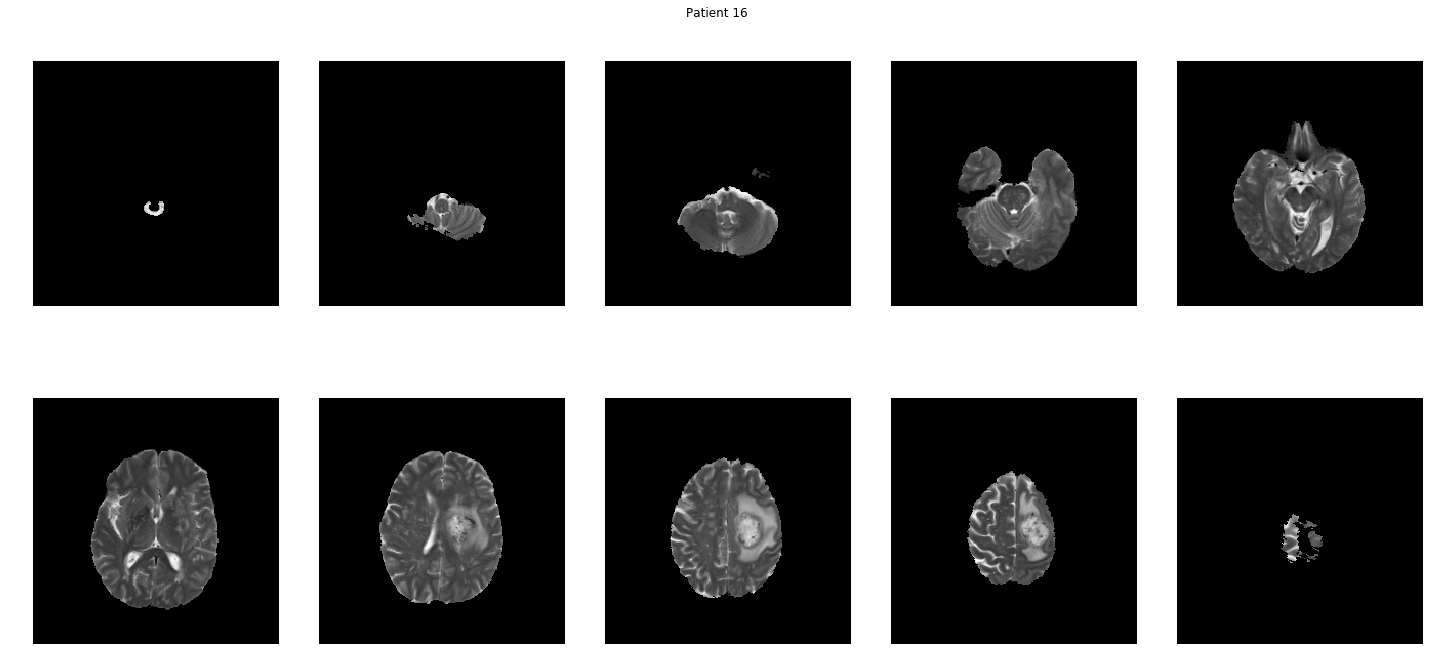

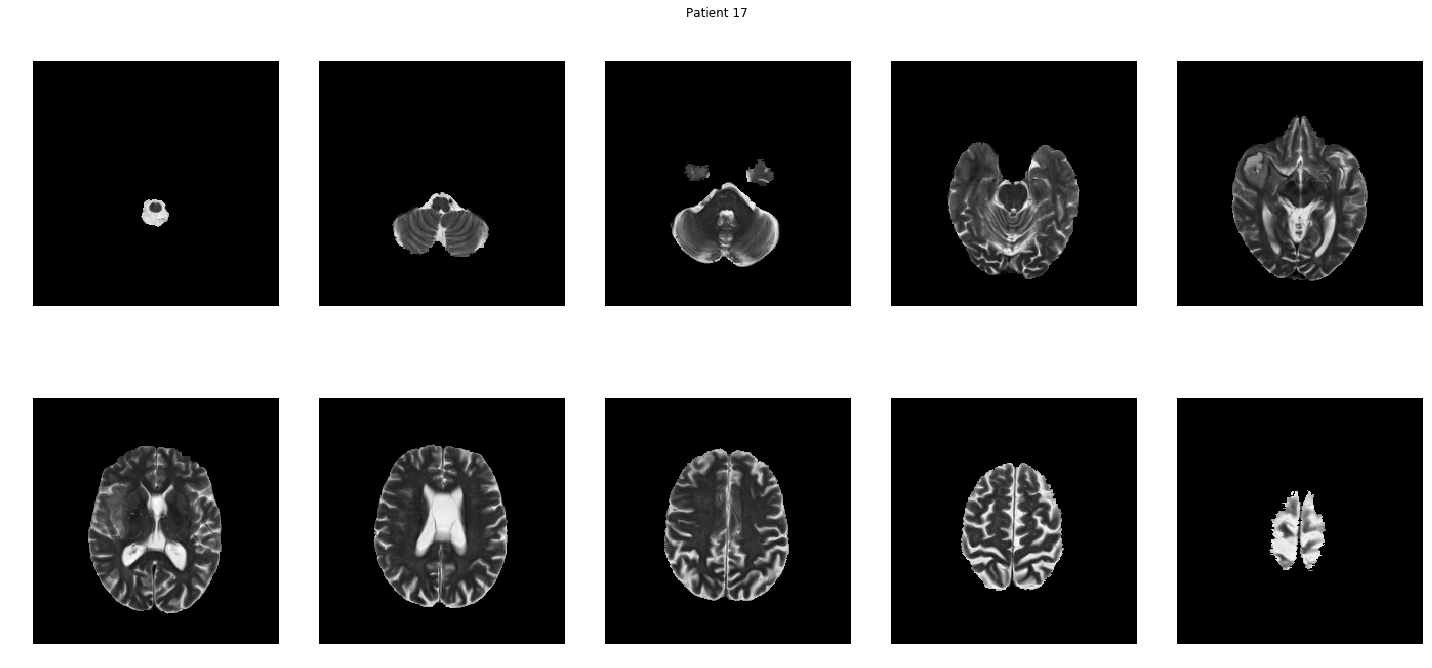

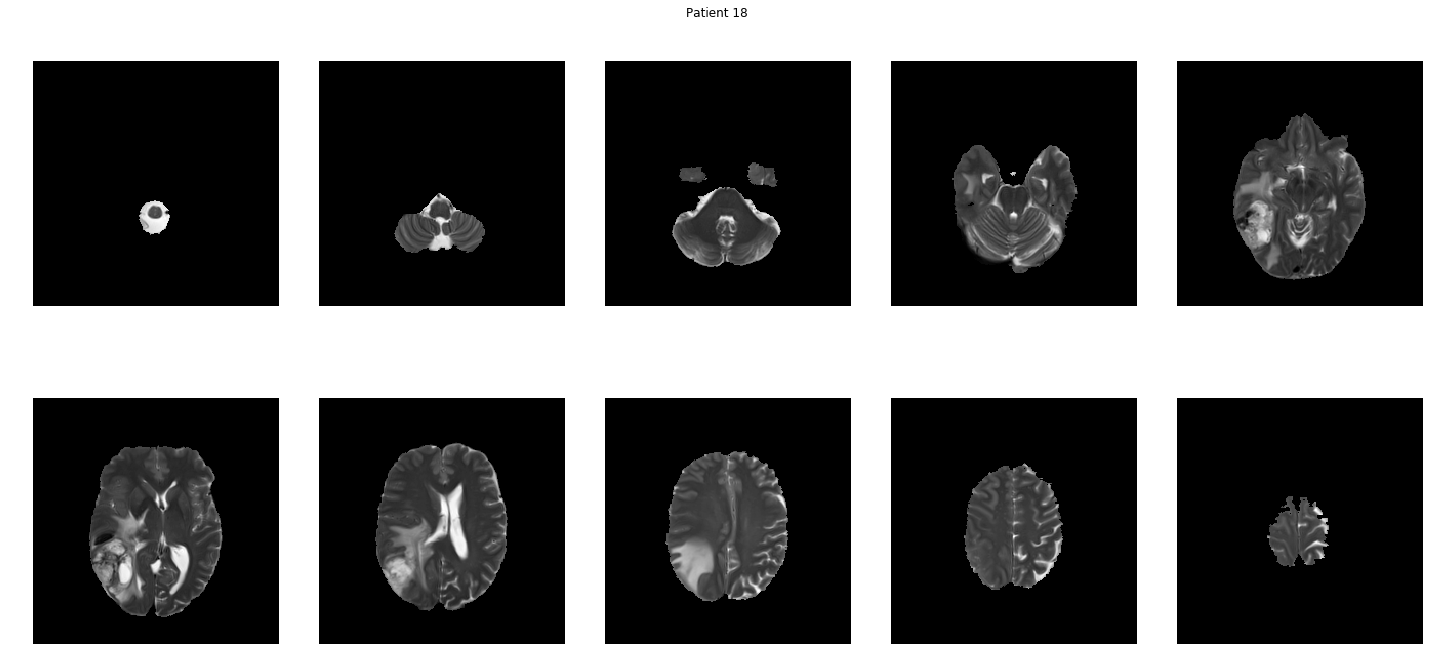

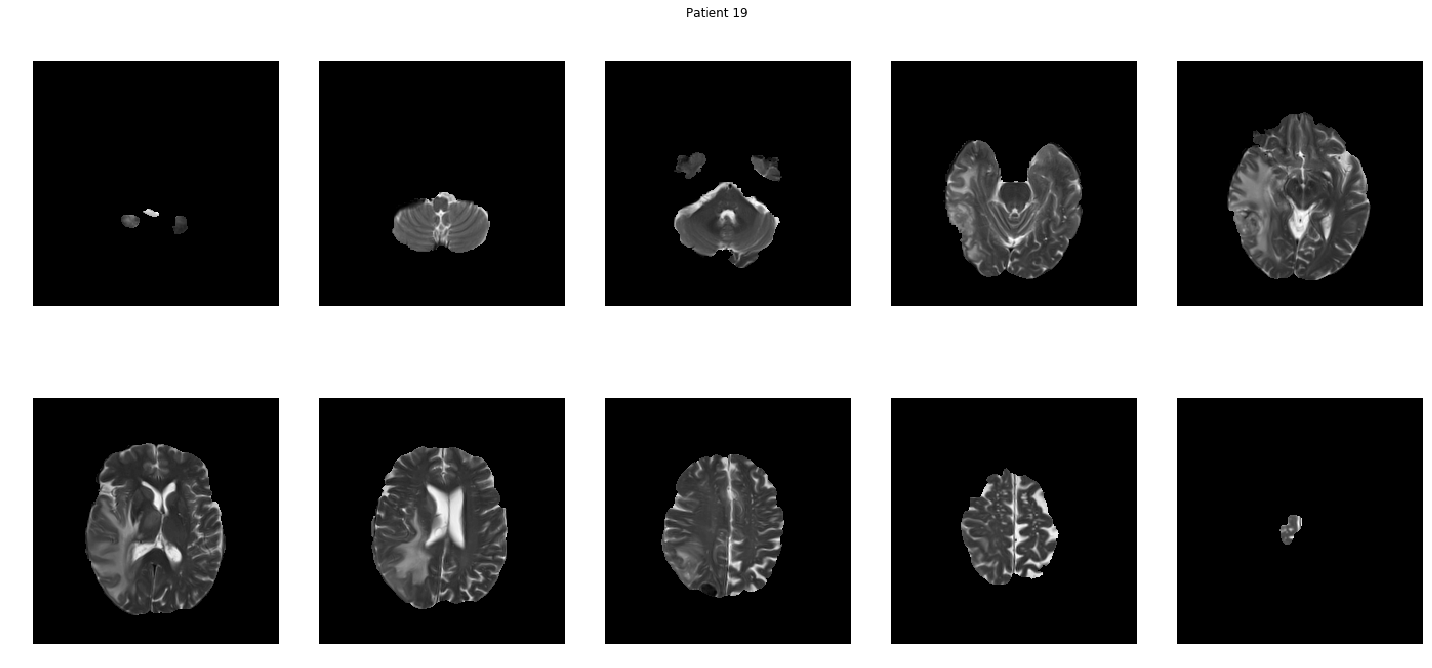

In [6]:
print('visualizing the slices..')
data_to_viz = 'training_data_hgg'
for pat in range(0, hdf5_file[data_to_viz].shape[0], 10):
    fig, ax = plt.subplots(nrows=2, ncols=5, squeeze=False, figsize=(20,10))
    ax = [i for ls in ax for i in ls]
    c = 0
    for a in ax:
        if c < 155:
            a.imshow(hdf5_file[data_to_viz][pat, 1,:,:,c], cmap='gray')
            a.axis('off')
            c += 15
        else:
            break
    plt.tight_layout()
    plt.suptitle('Patient {}'.format(pat))
    plt.show()

# Visualize individual patient

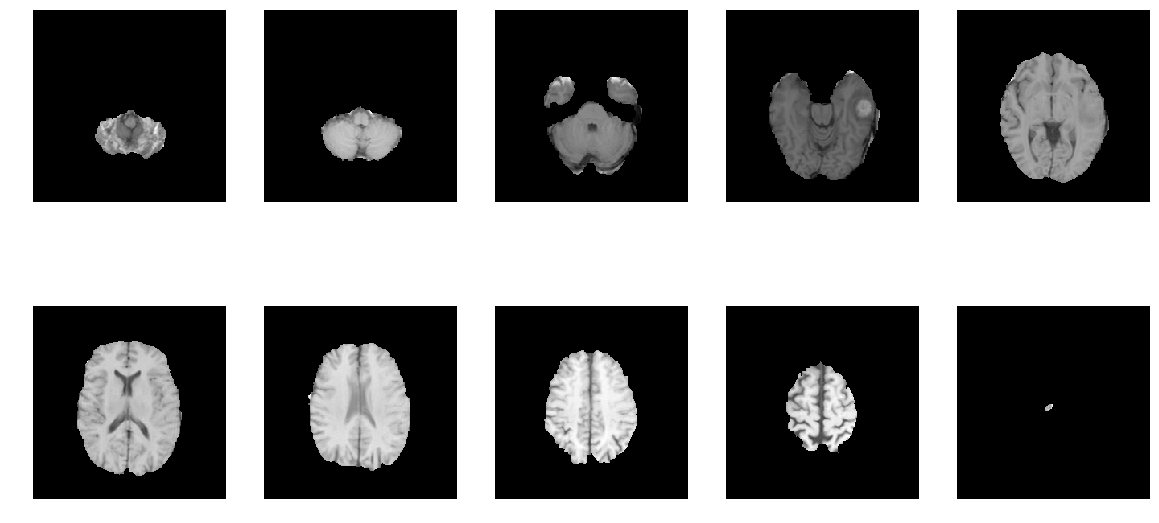

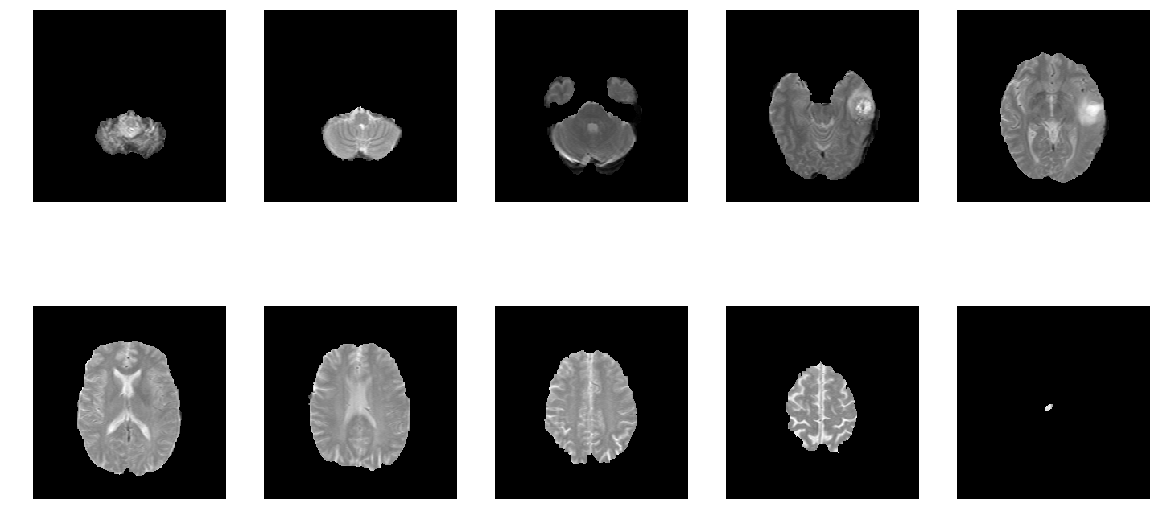

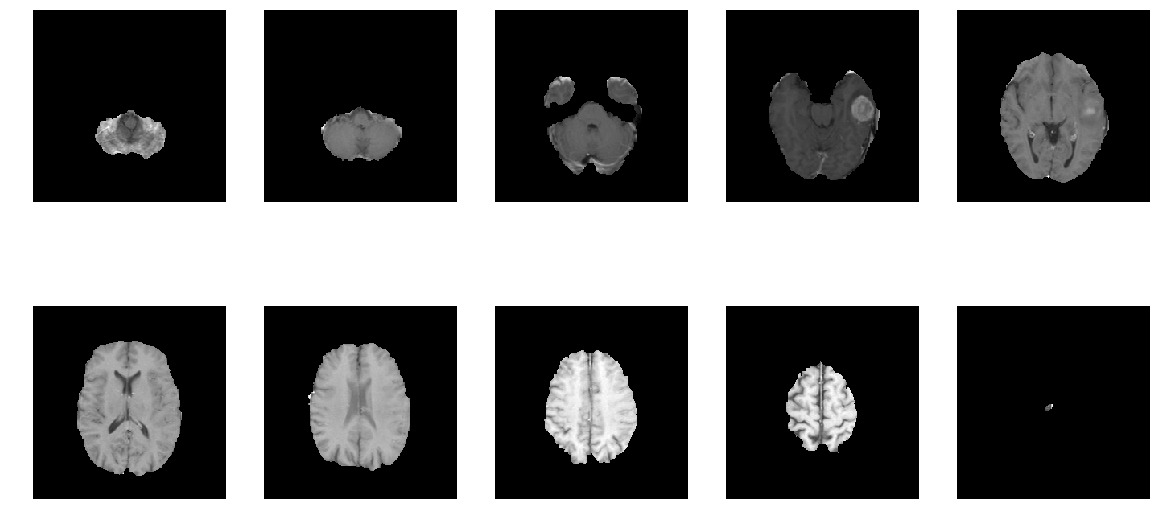

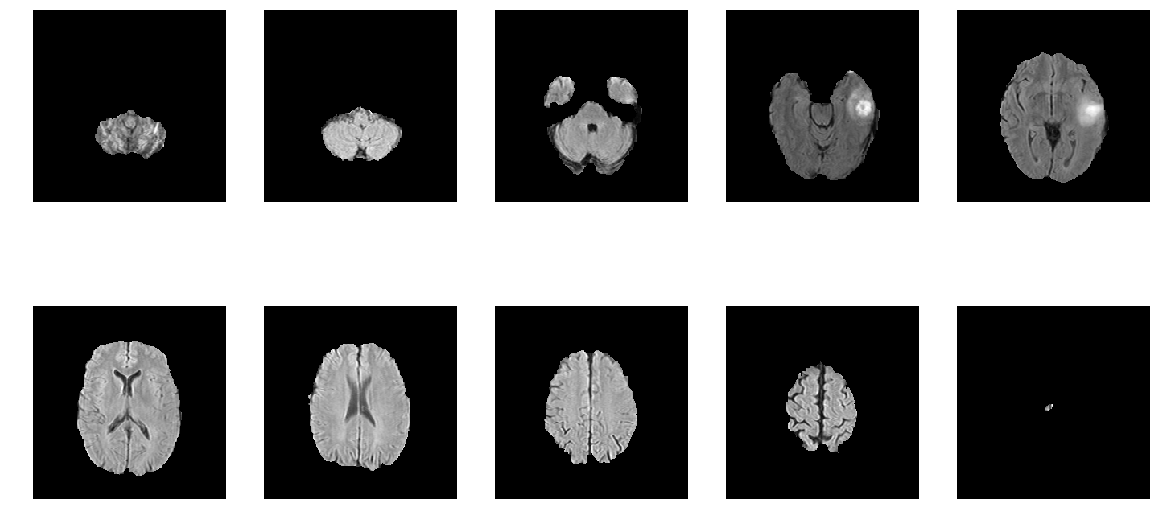

In [7]:
for mod in range(0,4):
    fig, ax = plt.subplots(nrows=2, ncols=5, squeeze=False, figsize=(20,10))
    ax = [i for ls in ax for i in ls]
    c = 0
    for a in ax:
        if c < 155:
            a.imshow(hdf5_file[data_to_viz][0, mod,:,:,c], cmap='gray')
            a.axis('off')
            c += 15
        else:
            break
            
plt.show()

# In depth testing

In [ ]:
for dataset_splits in glob.glob(os.path.join(config['data_dir_prefix'], '*')):
    if os.path.isdir(dataset_splits) and 'Validation' in dataset_splits:
        # VALIDATION data handler
        logger.info('currently loading Validation data.')
        count = 0
        # validation data does not have HGG and LGG distinctions
        for images, pats in dataloader.loadDataGenerator(dataset_splits, out_shape=config['spatial_size_for_training'],
                                                             batch_size=config['batch_size'], loadSurvival=False, csvFilePath=None,
                                                             loadSeg=False):
            logger.info('data equal?')
            val = np.array_equal(hdf5_file['validation_data'][count:count+config['batch_size'],...], images)
            logger.info(val)
            assert val == True

            t = 0
            for i in range(count, count + config['batch_size']):
                logger.info('pat_name equal?')
                val = hdf5_file['validation_data_pat_name'][i] == pats[t].split('/')[-1]
                logging.info(val)
                assert val == True

                t += 1

            count += config['batch_size']

    else:
    # TRAINING data handler
        if os.path.isdir(dataset_splits) and 'Training' in dataset_splits:
            for grade_type in glob.glob(os.path.join(dataset_splits, '*')):
                # there may be other files in there (like the survival data), ignore them.
                if os.path.isdir(grade_type):
                    count = 0
                    logger.info('Currently loading Training data.')
                    for images, segmasks, pats in dataloader.loadDataGenerator(grade_type, out_shape=config['spatial_size_for_training'],
                                                     batch_size=config['batch_size'], loadSurvival=False, csvFilePath=None, loadSeg=True):
                        logger.info('loading patient {} from {}'.format(count, grade_type))
                        if 'HGG' in grade_type:
                            logger.info('data equal?')
                            val = np.array_equal(hdf5_file['training_data_hgg'][count:count+config['batch_size'],...], images)
                            logger.info(val)
                            assert val == True

                            logger.info('segmasks equal?')
                            val = np.array_equal(hdf5_file['training_data_segmasks_hgg'][count:count+config['batch_size'], ...], segmasks)
                            logger.info(val)
                            assert val == True

                            t = 0
                            for i in range(count, count + config['batch_size']):
                                logger.info('pat_name equal?')
                                val = hdf5_file['training_data_hgg_pat_name'][i] == pats[t].split('/')[-1]
                                logger.info(val)
                                assert val == True
                                t += 1
                        elif 'LGG' in grade_type:
                            logger.info('data equal?')
                            val = np.array_equal(hdf5_file['training_data_lgg'][count:count+config['batch_size'], ...], images)
                            logger.info(val)
                            assert val == True

                            logger.info('segmasks equal?')
                            val = np.array_equal(hdf5_file['training_data_segmasks_lgg'][count:count+config['batch_size'], ...], segmasks)
                            logger.info(val)
                            assert val == True

                            t = 0
                            for i in range(count, count + config['batch_size']):
                                logger.info('pat_name equal?')
                                val = hdf5_file['training_data_lgg_pat_name'][i] == pats[t].split('/')[-1]
                                logger.info(val)
                                assert val == True
                                t += 1

                        count += config['batch_size']

In [ ]:
hdf5_file.close()